## Quantitavie Portfolio Exposure Research: A Fama-French Factor Perspective 

###### Wenbo Zhang


### Outlook 

* Abstract 


* Fama-French Beta of Industry Portfolios 
    - Portfolio Return Overview 
    - Estimate Factor Beta
        - 6 Factors VS 4 Factors: Variable Selection 
        - Beta Dynamics: Ornstein–Uhlenbeck Process
            

* Industry Grouping
    - Portfolio Characteristics Clustering Analysis: LDA+ K-Means 
        - LDA and PCA: Data Projection 
        - Fundamental Rationale 



* Portfolio Construcion 
    - Two long only fully invested portfolios: Min Variance and Equal Weight 


* Summary 
    - Further Improvement 


* Appendix 
    - A0.Data
    - A1.Return Series Overview
    - A2.Rolling Beta and Longterm Beta 
    - A3.Dynamic Beta: Smoothing and Filtering 
    - A4.Industry Grouping: LDA and KMeans 
    - A5.Portfolio Construction and Rebalancing: Min Variance and Equal Weight 



### Abstract 

In asset pricing and portfolio management, Fama-French (FF) factor model is a famous approach to explain asset returns. This article applies Fama-French model to twelve industry portfolios and estimates factor loadings (beta) for each. A mean reversion process to capture period to period beta dynamics is introduced. It controls the deviation of short-term local beta to its long-term mean, and smooths the change. The industries are categorized into four groups based on the portfolio betas and other charateristics. Two long only portfolios are constructed and the performances get compared. One interesting fact is the conservative portfolio generates higher cumulative risk adjusted return.  


### Fama-French Beta of Industry Portfolios 


#### Portfolio Return Overview 


The twelve industry portfolios are constructed by market cap weight. It is categorized by French. The FF factors envolve from 3 to 5. Two new factors **RWM** and **CMA** were introduced in 2015. They are designed to capture the profitability and investment style, while the factor portfolio returns show some correlations to the traditional 3 factors. Momentum is a factor over which practioners show consistent interest. It is added to the FF framework. Both the industry and factor portfolio returns show symmetric distribution and weak serial autocorrelation. For more details, please check Appendix.A1. 

Part of the industry and factor portfolio returns: 

In [147]:
industry_ret.head(5)

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
1988-01-01,0.0302,0.0448,0.0079,0.0868,-0.0060,-0.0247,0.0976,0.0976,0.0564,0.0637,0.0892,0.0057
1988-02-01,0.0601,0.0627,0.0825,0.0353,0.0600,0.0745,0.0132,-0.0143,0.1053,0.0420,0.0303,0.0753
1988-03-01,-0.0152,-0.0417,-0.0039,0.0247,-0.0281,-0.0480,-0.0382,-0.0317,-0.0100,-0.0255,-0.0260,0.0169
1988-04-01,-0.0007,0.0290,0.0189,0.0454,0.0109,0.0267,0.0067,-0.0029,0.0174,-0.0199,-0.0049,-0.0024
1988-05-01,-0.0030,0.0123,0.0006,-0.0052,-0.0112,-0.0137,0.0217,0.0359,-0.0137,-0.0026,0.0202,-0.0138


In [148]:
factor_ret6.head(5)


,Mkt-RF,SMB,HML,RMW,CMA,MOM
1988-01-01,0.0421,-0.0054,0.0517,-0.0107,0.0220,-0.0758
1988-02-01,0.0475,0.0334,-0.0165,0.0188,-0.0008,-0.0154
1988-03-01,-0.0227,0.0624,0.0075,-0.0027,0.0189,0.0063
1988-04-01,0.0056,0.0113,0.0168,-0.0020,0.0190,0.0225
1988-05-01,-0.0029,-0.0260,0.0228,-0.0076,0.0034,0.0064


#### Estimate Factor Beta


FF model assumes 

$$
R- R_f= \alpha+ X\beta+ \epsilon
$$

$R: $ return of an asset

$R_f: $ risk free return 

$\alpha : $ interception, the expected unexplained residual returns 

$X : $ the factor returns

$\beta : $ factor beta/exposure

$\epsilon : $ mean-subtracted residual returns 


From the perspective of FF model, the asset space is generated by factors. One asset is determined by factor betas (plus $\alpha $ and $\epsilon$ which capture idiosyncratic risk). Therefore $\beta$ is  an important characteristic of the asset. The following sections are contributed to develop robust and effective estimators for betas of the twelve industry portfolios. 

#### 6 Factors VS 4 Factors: Variable Selection 

In 2015, Fama and French introduced 2 new factors **CMA** and **RMW**, plus 3 traditional factor **Mkt-RF**, **HML** and **SMB**, to construct a 5 factor model (or 6 factors if **MOM** is counted). This section will apply LASSO regression to select a concise and robust model for each industry, and then employ OLS to fit the concise model. The result will be compared to both 6 factor model and 4 factor model. 

LASSO is a popular method to thin a redundant model. It introduces a L1 penalty (absolute value) with respect to beta. Therefore the exposure to factors which have little explanation power will be forced to zero as the penalty multiplier grows. This technique is applied to all industries and a concise model is selected for each. Below is selected model for `Chems` (`Mkt-RF`, `CMA`, `RMW` are selected, no intercept). Then OLS model will be fitted to estimate betas for the selected factors. For other industries, please check Appendix. A2. 

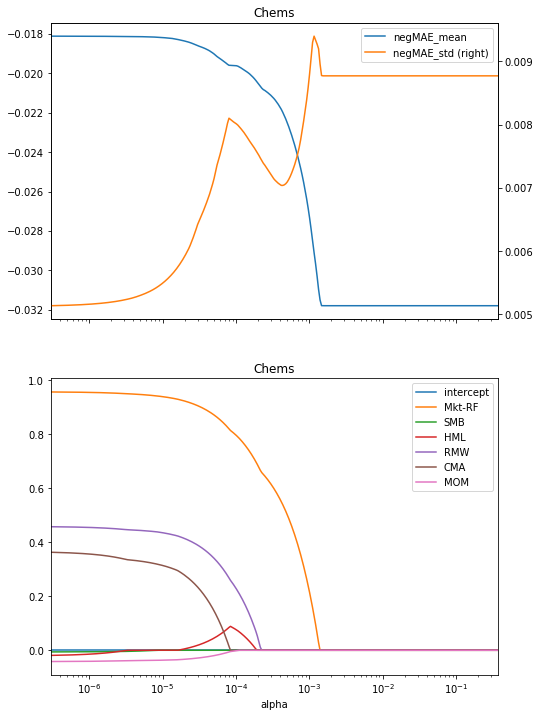

In [149]:
fig_dic['Chems_lasso']

To compare the explanation power of FF 6 factor model, 4 factor model and industry specific concise model, the rolling verison of these 3 models are fitted. For each model, it gets refitted in every Feb end by  least square with exponentially decayed weight (WLS with window size =300). The updated betas are used to explain the following 12 month industry portfolio returns (so it is out of sample). Mean absolute error metric is used to measure the error. The preferred model should have smaller errors (cross industry) than others. Below is the comparation. 

In [150]:
ModelMAE_OOS

,BusEq,Chems,Durbl,Enrgy,Hlth,Manuf,Money,NoDur,Other,Shops,Telcm,Utils
rolling_M1,0.021917,0.019197,0.028805,0.037887,0.025443,0.016026,0.017378,0.017272,0.013881,0.018823,0.025597,0.029230
rolling_M2,0.022553,0.020053,0.028979,0.036373,0.024879,0.017279,0.017574,0.020944,0.013582,0.020811,0.024466,0.029350
rolling_M3,0.021917,0.018381,0.028862,0.035616,0.024879,0.015962,0.017378,0.017086,0.013582,0.018592,0.023340,0.029115


Note: M1 is the FF 6 factor model; M2 is FF 4 factor model and M3 is the industry concise model refined by variable selection . 

The concise model does have smaller MAE error (more explanation power) than others. Below is  long-term beta estimation using the concise model .For more details, please check Appendix.A2 

In [151]:
industry_longtermBeta

,Other,BusEq,Shops,NoDur,Money,Chems,Manuf,Utils,Durbl,Enrgy,Telcm,Hlth
CMA,NaN,-0.397859,NaN,0.473476,-0.241637,0.332491,NaN,NaN,NaN,NaN,NaN,NaN
HML,0.168935,-0.469794,-0.078569,-0.199956,0.740830,NaN,0.166198,0.357876,0.540375,0.402924,NaN,-0.105531
MOM,-0.065915,-0.092778,-0.056200,NaN,-0.047346,NaN,-0.090351,0.110042,-0.303012,NaN,NaN,0.091264
Mkt-RF,1.028668,1.140026,0.971342,0.861763,1.147278,0.953915,1.153732,0.533225,1.207891,0.770650,0.999297,0.780272
RMW,NaN,-0.375944,0.542399,0.643235,0.049213,0.443190,0.322998,0.125428,0.178055,NaN,NaN,NaN
SMB,0.160757,0.084949,0.220936,NaN,-0.082626,NaN,0.218536,-0.156848,0.347779,NaN,-0.222141,-0.234340


#### Beta Dynamics 

This section makes efforts to model beta dynamics. First it is shown that the rolling beta does tilt over time. Allowing beta to change boosts the explanation power for all 3 models. A mean reversion process is implied. The Ornstein–Uhlenbeck process is calibrated to control the beta evolution. It combines with the rolling computation to give a smoothed beta estimator over time. 

##### Is Beta Constant or Drifting over Time? 

Simplly from the plot of rolling regression result, beta seems to change over time. Below is the plot for Chems. Please check Appendix.A2 for other industries. 

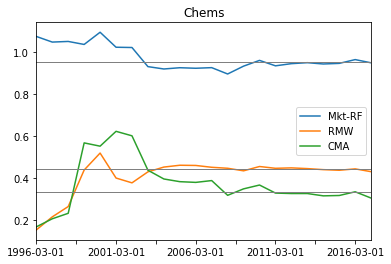

In [152]:
fig_dic['Chems_rollingBeta']

The rolling VS constant model also implies that a 'local' beta have more explanation power compared to a constant. 

In [153]:
pd.concat( [ModelMAE_OOS, ModelMAE_OOS_const], axis=0)

,BusEq,Chems,Durbl,Enrgy,Hlth,Manuf,Money,NoDur,Other,Shops,Telcm,Utils
rolling_M1,0.021917,0.019197,0.028805,0.037887,0.025443,0.016026,0.017378,0.017272,0.013881,0.018823,0.025597,0.029230
rolling_M2,0.022553,0.020053,0.028979,0.036373,0.024879,0.017279,0.017574,0.020944,0.013582,0.020811,0.024466,0.029350
rolling_M3,0.021917,0.018381,0.028862,0.035616,0.024879,0.015962,0.017378,0.017086,0.013582,0.018592,0.023340,0.029115
const_M1,0.025478,0.021303,0.030072,0.039608,0.033619,0.016885,0.020536,0.018314,0.014981,0.020902,0.025554,0.031471
const_M2,0.024418,0.022308,0.029735,0.037479,0.029253,0.017196,0.020180,0.025315,0.014644,0.027041,0.026571,0.029694
const_M3,0.025478,0.020254,0.029751,0.036321,0.029253,0.016810,0.020536,0.017965,0.014644,0.020923,0.023698,0.030810


Note the rolling version has smaller out of sample MAE than constant version, cross all industries and models. It suggests that rolling beta has more explanation power than constant beta-- i.e. Beta is time varying.

##### Dynamic Beta: Ornstein–Uhlenbeck Process

**Why beta is mean reverting? **

Assuming beta varies through time, one may argue that beta can trend. It is probable if one is thinking at company/stock level. Apple nowadays is way different from what it was 15 years ago. The Apple stock factor exposures change permanently. But for industry portfolios, the factor betas, as portfolio characteristics, are very stubborn to change. The deviations are driven by investor behaviors and short-term momentums. A mean reversion should be expected, though it can be very slow. 



** Out of Sample Filtering **


The rolling beta estimation starts from 1996-03-01 to 2017-03-01 for each factor. The slice from 1996-03-01 to 2005-03-01 is consumed to calibrate the OU process. The weighted average of one-period out of sample OU forecasting and rolling beta estimation (both use no future information), with weight equal to the reciprocal of each variance, gives the smoothed beta estimator, starting from 2006-03-01. 

Note the OU process is equivalent to AR(1) model in statistics. It assumes more structure and constrains the AR(1) coefficient to be positive. 

Below is the smoothed beta estimation for `Engry`. Compared to the raw rolling beta, the smoothing is effective. 

**Note** : the out-of-sample filtering is challenging. It replies on the OU model calibration, which needs at least one deviation-convergence cycle. In this case, due to data sparsity, the filtering does not perform well in some cases. For more details and discussions, please check Appendix.A3 and the Further Improvement section. 

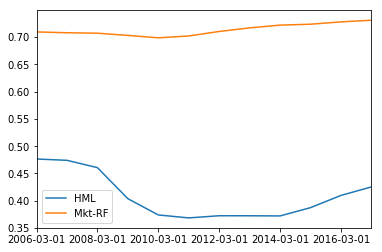

In [154]:
industry_rollingLoading_OUSmoothed['Enrgy'].plot()

**In Sample Smoothing**

In sample smoothing is relatively easy- in nature, in sample smoothing means utilizing future information (eg long term mean) to fix local noise. The smoothed data usually performs better. 

Here one bayesian smoother is employed to smooth the rolling beta. The beta estimation and variance based on full sample is treated as prior while the local rolling betas are obervations. Please check Appendix.A3 for more details. 

Below is the smoothed and raw version of rolling beta for `Hlth` and `Chems`. The smoothing effectively reduced out of sample MAE. 

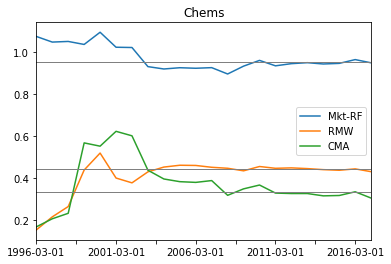

In [155]:
fig_dic['Chems_rollingBeta']


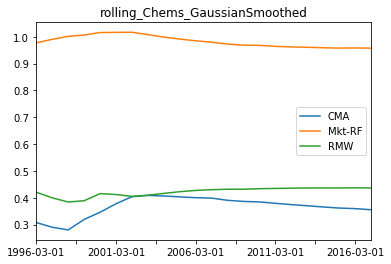

In [156]:
fig_dic['Chems_GaussianSmoothed']

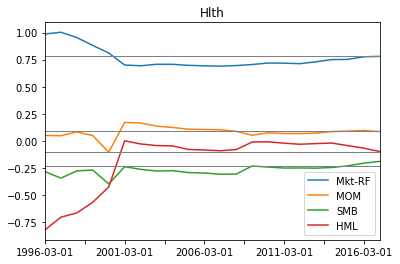

In [157]:
fig_dic['Hlth_rollingBeta']

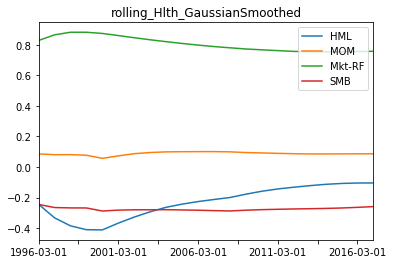

In [158]:
fig_dic['Hlth_GaussianSmoothed']

### Industry Grouping 

This section attempts to group industries from the perspective of beta and other portfolio characteristics. Fundamental analysts usually think stocks as cyclic or defensive, while the factor exposures suggests a more subtle categorization. 



#### Portfolio Characteristics Clustering Analysis: LDA+ K-Means 
       
       
As discussed above, an asset can be treated as a linear combination of factors plus idiosyncratic characters. Two industries should behave similaryly if their factor exposures are close. Therefore one intuitive strategery is to group industries with similar factor betas. 

The rolling regression results in last section are used here as observations of beta. Below is part of the sample. Please check Appendix.A4 for details.

In [159]:
industry_features.head(5)

,CMA,HML,MAE,MOM,Mkt-RF,RMW,R_SQ,SMB
LABEL,,,,,,,,
BusEq,-1.012638,0.143675,0.021088,-0.019000,0.961142,-0.170027,0.708407,0.363699
BusEq,-0.908633,0.006530,0.022015,-0.021488,1.046407,-0.158970,0.719824,0.276404
BusEq,-1.197940,0.092654,0.022536,0.026548,1.019415,-0.213134,0.740972,0.141793
BusEq,-1.307053,-0.007274,0.023343,0.116992,0.951186,-0.304657,0.793211,0.047489
BusEq,-0.988375,-0.221214,0.023957,0.149078,0.954890,-0.343866,0.809420,0.177920


R_SQ is the R Squared of the rolling regression and MAE is the in sample mean absolute error. They serve as measurement of significance of idiosyncratic components. 

Each industry has 22 observations and each observation is in $R^8$. The LDA transformation is played to reduce the dimensions. The elbow plot of KMeans suggests 4 centroids. Below is the KMeans clustering analysis result. 


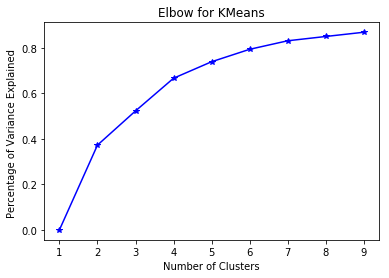

In [160]:
fig_dic['KM_elbow_2']

In [161]:
SuperSector

{'A': ['Money', 'Durbl'],
 'B': ['NoDur', 'Manuf', 'Chems', 'Shops', 'Other'],
 'C': ['Enrgy', 'Telcm', 'Utils', 'Hlth'],
 'D': ['BusEq']}

The plot of the first 3 dimension of LDA transformation confirms KMeans. 

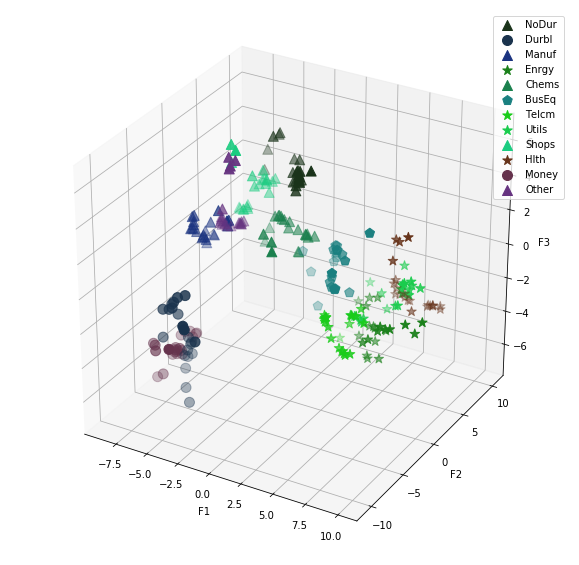

In [162]:
fig_dic['Industry_Grouping_3d_1']

`BusEq` looks close to industries in `SuperSector[C]` (the industries with star marker). It is due to view direction. The next plot shows that BusEq should be treated differently. 

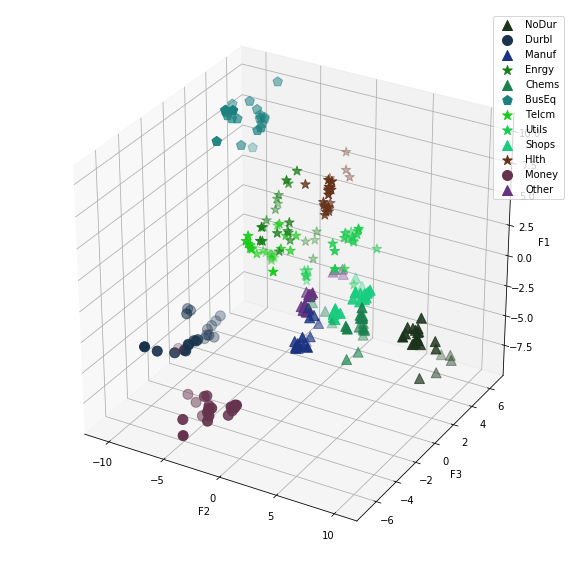

In [163]:
fig_dic['Industry_Grouping_3d_2']  


Change the view direction. It is clear `BusEq` gets seperated from others. The 3d-LDA plot agrees with the KMean clustering result, which categorizes BusEq as an one-industry group.

The industries cluster in 4 groups. And since the data is cross time (1996-2017), this grouping is persistant. Appendix.A4 provides more details. 




##### LDA and PCA: Data Projection 
       

** Why not PCA? **

The dimension reduction technique above plays a critical role to visualize the data. 

Both PCA and LDA are popular data projection tricks. PCA projects data over the direction where variance is maximized, while LDA, which is a supervised learning method and requires label information, transforms the data so that different labels are as seperated as possible, i.e. the ratio of between group varience over within group variance is maximized. 

In this industry grouping application, since the label (industry) information is accessable. LDA is preferred, and it does perform better than PCA. 

##### Fundamental Rationale 


Above categorization is not against the traditional cyclic-defensive taxonomy. It treats the industry in a more subtle way. `SuperSector[A]`, the `Durbl` and `Money` are similar to consumer discrionary and financials, which are typical **cyclics **. `SuperSector[C]`, the `Telcm`, `Hlth` and `Utils` show low correlation with the market, and are traded as **defensive** assets. `SuperSector[B]` and `SuperSector[D]` are somewhere between the polars. 

### Portfolio Construcion 
#### Two long only Portfolios: Min Variance and Equal Weight 



This section constructs two long only fully invested portfolios 



P1. Portfolio with variance minimized and no SuperSector claiming weights more than 50%

P2. Portfolio with equal weight over 12 industries. 



Both get initialized on 1995-01-01. For P2, the target weight is constant, 1/12 for each industry, while the target weight of P1 depends on covariance matrix estimation. Here the target weight of P1 gets recalculated every 5 year (at 2000-01-01, 2005-01-01, 2010-01-01 and 2015-01-01). Each time the covariance matrix is re-estimated based on all avaliable history at that time point.

The two portfolios are rebalanced monthly. 


Below are the portfolio weights and summary of  performance. The details of portfolio optimization are in Appendix.A5. 

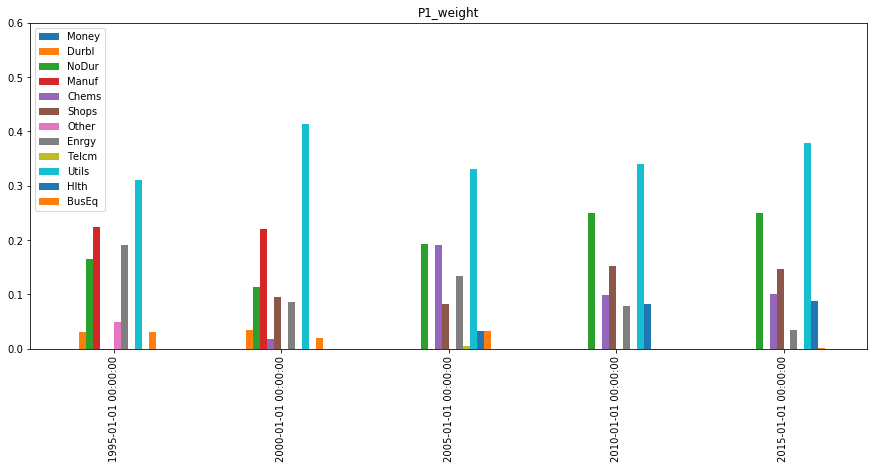

In [164]:
plt.figure( figsize=( 15,6))
P1_target_w.plot(ax= plt.subplot(111), kind='bar', title= 'P1_weight', ylim=(0, 0.6))

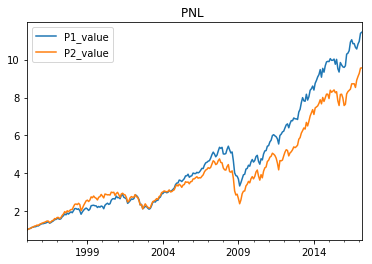

In [165]:
P[['P1_value', 'P2_value']].plot(title= 'PNL ')

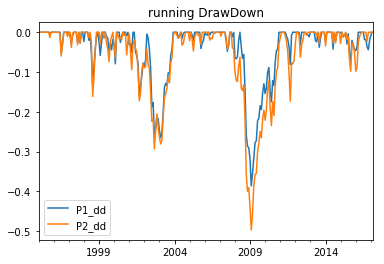

In [166]:
P[['P1_dd', 'P2_dd']].plot( title='running DrawDown')

In [167]:
P_characteristics

,AnnualSharpe,Avg_MonthlyRet,DiversificationRatio,MaxDrawDown,Mkt_Beta,MonthlyRet_Vol
P1,0.977161,0.009779,1.175444,-0.386191,0.643149,0.034665
P2,0.790635,0.009342,1.223201,-0.496756,0.902902,0.040932


P1 has less volatility than P2, which is not surprised since P1 is constructed as a constrained min variance portfolio. P1 accumulates a higher total return at termination. It implies  **being conservative gets paid in long term ** . 

P1 dominates P2  from the perspective of either risk, return or the ratio. The success is attributed to the optimization. ** A rigorous and scientific portfolio construction effort is worthwhile.  **


### Summary 


This article measures a portfolio's exposure from a factor perspective. Much of the effort is devoted to factor beta estimation. Rolling regression is employed to capture beta tilt, and a mean reversion process is calibrated to model beta dynamics. The interaction of these two approaches generates a smoothed beta estimation. Based on the rolling beta exposures, twelve industries cluster into 4 groups over the factor space. 

### Further Improvement


**Beta Estimation, Out of Sample Filtering**

The forecasting-observation interaction to give stable beta estimator is in nature the same as Kalman Filter, which is a popular signal smoothing technique. This article averages forecasting and observation with weight as reciprocal of variance, while Kalman Filter updates the status more delicately (it assumes beta to be a distribution, and the distribution gets updtated by the observations). With careful parameter tunning , it may generate better estimator. 

Another possible direction is to remove the mean reversion assumption. Given the fact that OU calibration fails for some factors, relaxing this constrain may be plausible. Inspired by in sample smoothing, one approach is to assume beta to be Gaussian distributed. Starting from one rolling regression estimation mean and variance as initial guess of distribution mean and variance, one may use the following rolling regression results as observations to update the guess. 

**Portfolio Construction, Input Sensitivity**

The portfolio construction in last section proves the success of optimization out of the sample. One may notice the sensitivity of portfolio weight to the input, covariance matrix. The improvement may arise from a stable and robust covariance matrix estimator, or a framework which is insensitive to input noise (Black Litterman). 

### Appendix 



#### A0. Data


The industry and factor portfolio data can be sourced from Professor Kenneth R. French's Data Library, http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/index.html . The monthly return data from 1988-Jan to 2017-Mar is used. Note the return is unannualized percentage return. 

#### A1.Return Series Overview

In [1]:
import pickle
import pandas as pd
import matplotlib as mat 
import matplotlib.pyplot as plt
%matplotlib inline 

df_dic= pickle.load( open( 'df_dic.p', 'rb'))
industry_ret= df_dic[ 'industry_ret']/100
factor_ret6= df_dic[ 'factor_ret'] /100
RF= factor_ret6['RF']
factor_ret6= factor_ret6[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'MOM']]
factor_ret4= factor_ret6[['Mkt-RF', 'SMB', 'HML', 'MOM']]
# df_dic[ 'factor_ret'].head(10) / 100

fig_dic= {}

print( factor_ret6.corr()) 

print( factor_ret4.corr())


          Mkt-RF       SMB       HML       RMW       CMA       MOM
Mkt-RF  1.000000  0.195298 -0.175688 -0.408777 -0.378200 -0.249087
SMB     0.195298  1.000000 -0.119756 -0.461412 -0.039220  0.010989
HML    -0.175688 -0.119756  1.000000  0.362316  0.652364 -0.195144
RMW    -0.408777 -0.461412  0.362316  1.000000  0.213765  0.081226
CMA    -0.378200 -0.039220  0.652364  0.213765  1.000000  0.054860
MOM    -0.249087  0.010989 -0.195144  0.081226  0.054860  1.000000
          Mkt-RF       SMB       HML       MOM
Mkt-RF  1.000000  0.195298 -0.175688 -0.249087
SMB     0.195298  1.000000 -0.119756  0.010989
HML    -0.175688 -0.119756  1.000000 -0.195144
MOM    -0.249087  0.010989 -0.195144  1.000000


The Fama-French (FF) 4 factors shows no significant correlation, while the FF 6 factors are correlated. The new factor CMA shows 0.65 correlation to HML, and RMW has -0.46 correlation to SMB. 

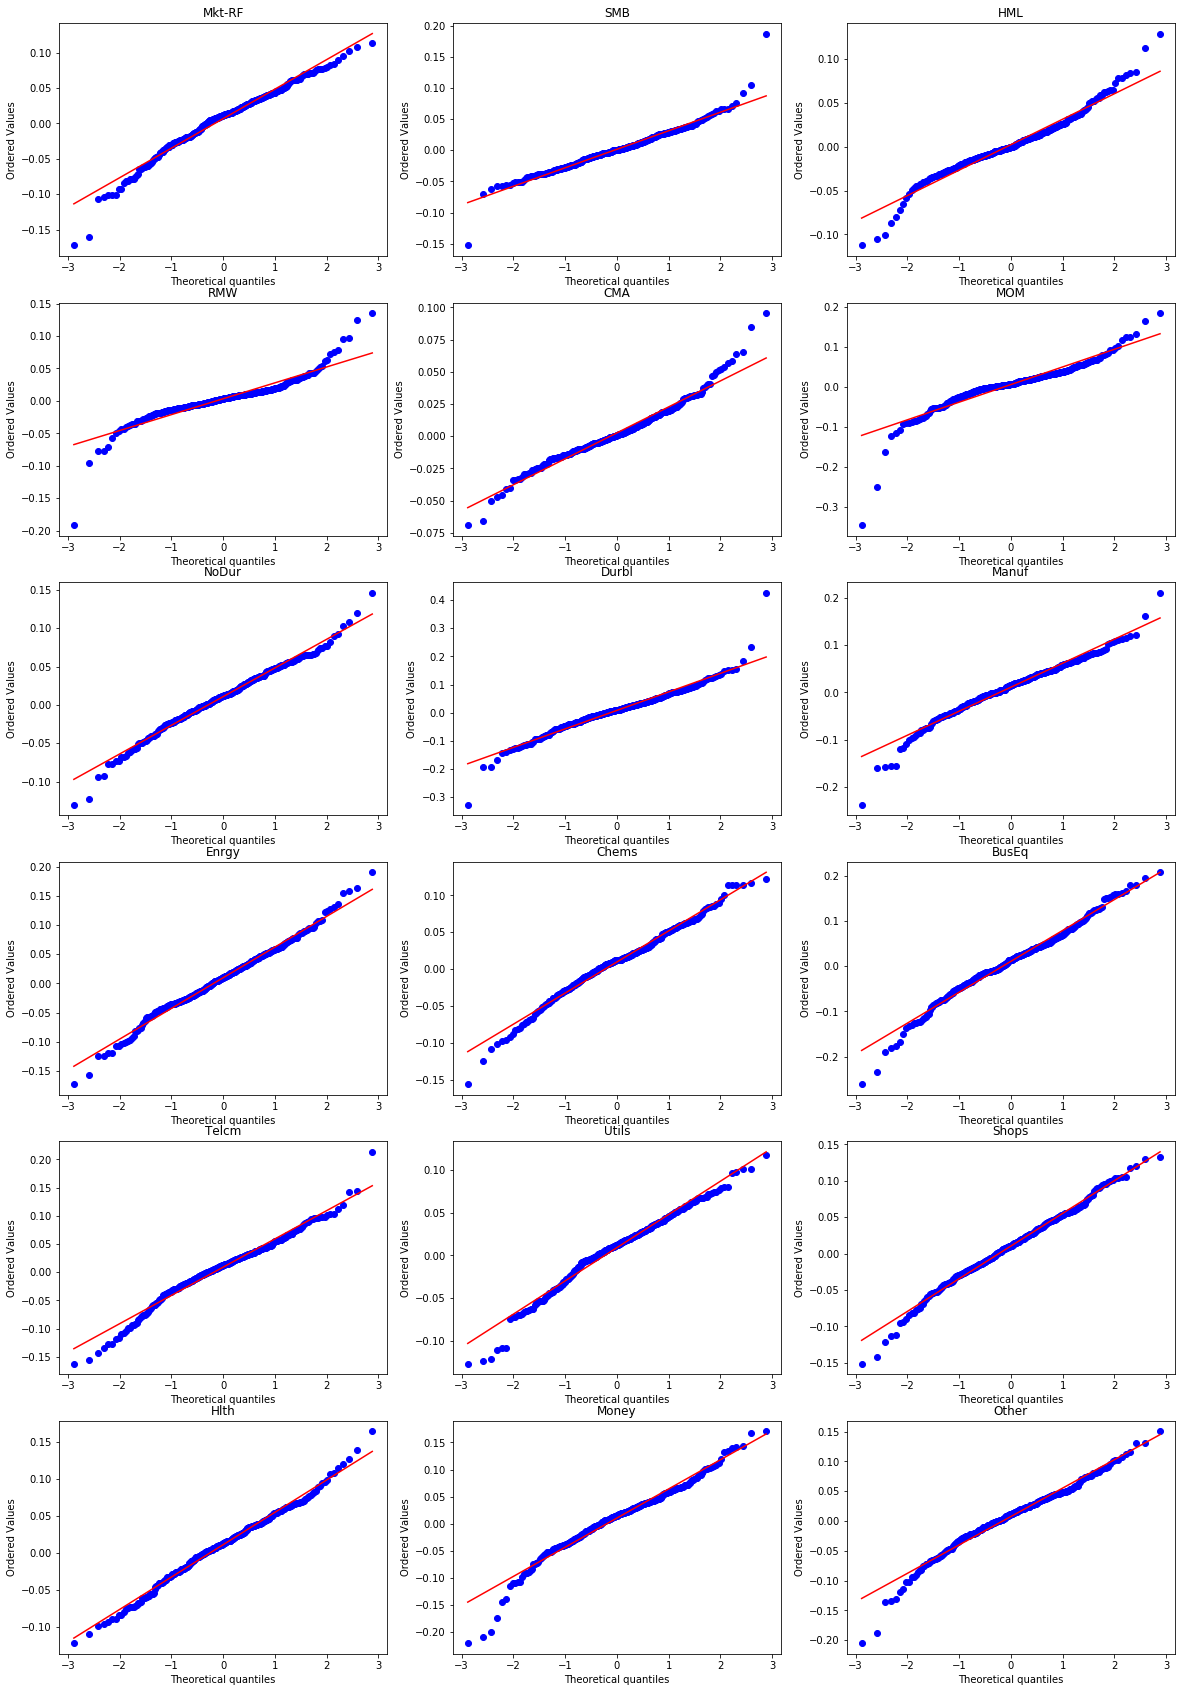

In [2]:
from scipy.stats import probplot

g= plt.figure( figsize=(20,30))
plt.subplot( 6,3,1)
i=1


for col in factor_ret6.columns:
    u= probplot(factor_ret6[col], plot= plt.subplot(6,3,i))
    i=i+1
    plt.title(col)
for col in industry_ret.columns:
    u= probplot( industry_ret[col], plot= plt.subplot(6,3,i))
    i=i+1
    plt.title(col)
    
fig_dic['ret_qq_plot']=g

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


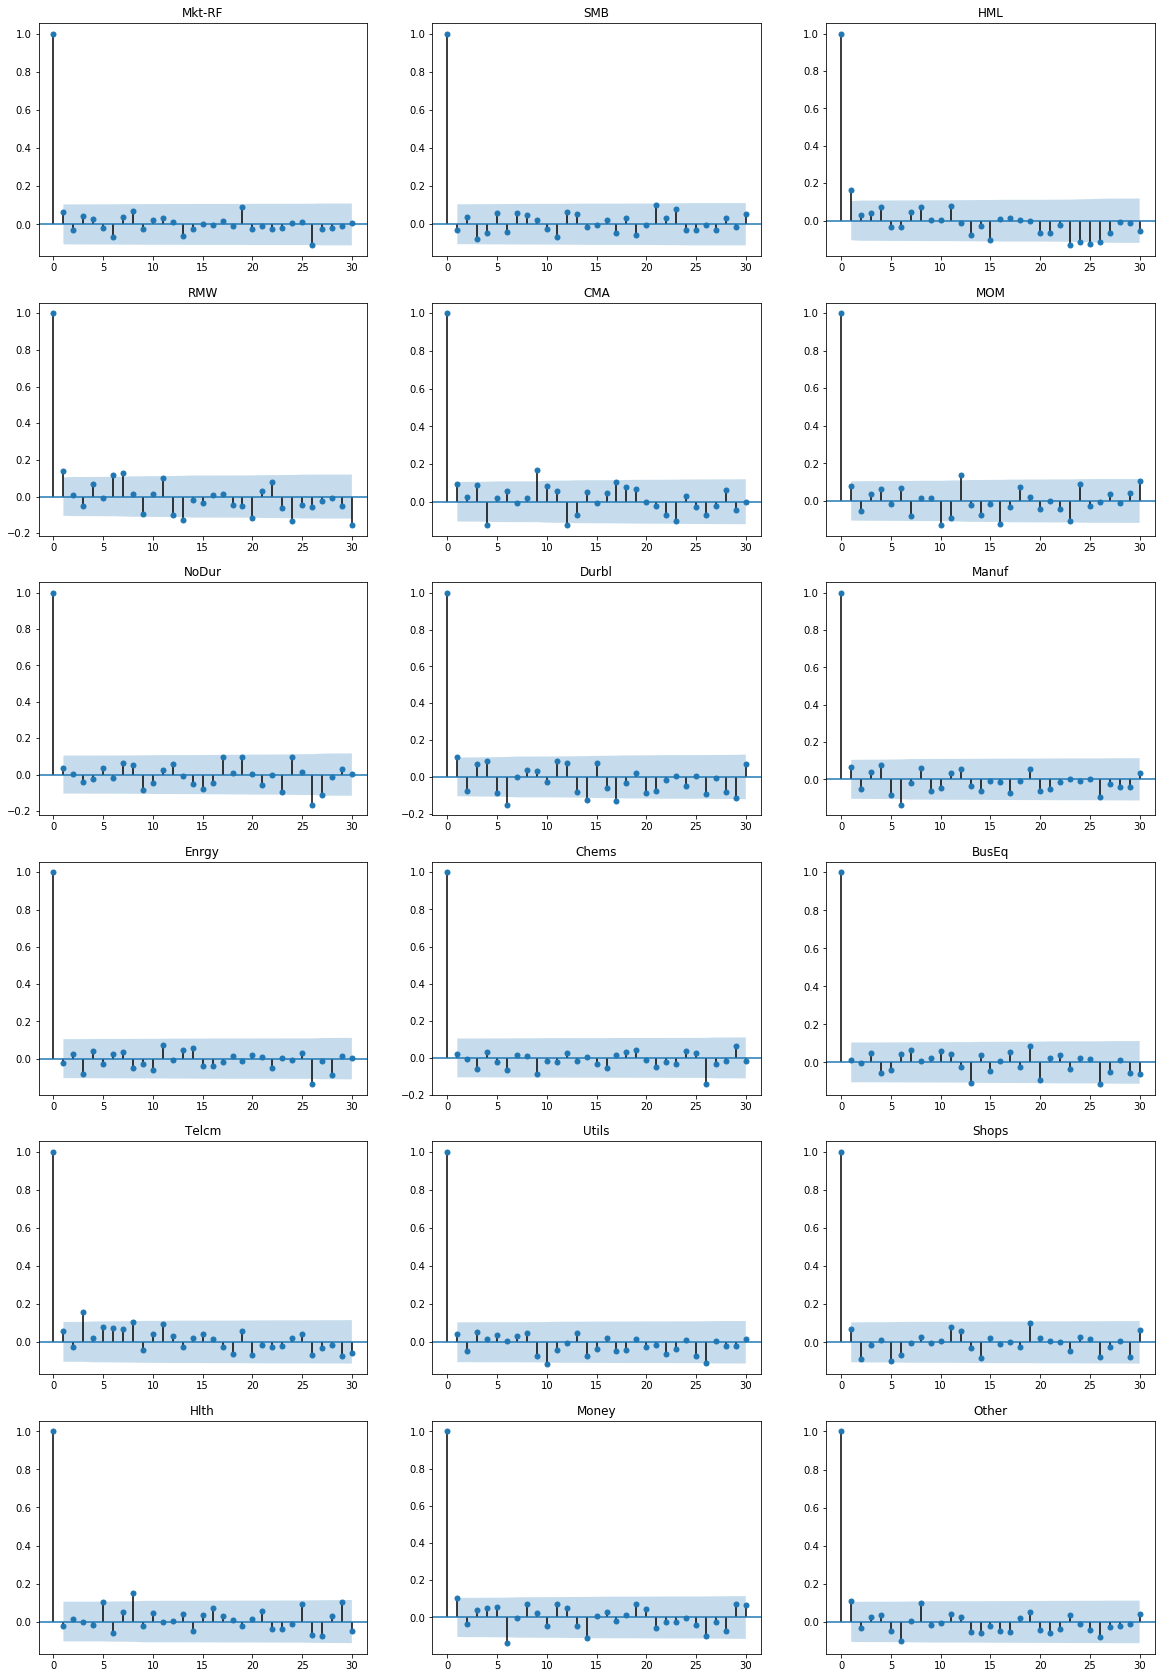

In [3]:
from  statsmodels.graphics.tsaplots import plot_acf

g= plt.figure( figsize= (20, 30))
plt.subplot( 6,3,1)
i=1
for col in factor_ret6.columns:
    u= plot_acf( factor_ret6[col], lags=30, ax= plt.subplot(6,3,i) )
    plt.title(col)
    i=i+1
for col in industry_ret.columns:
    u= plot_acf( industry_ret[col], lags=30, ax= plt.subplot(6,3,i))
    plt.title(col)
    i+=1
    
fig_dic['ret_acf_plot']= g

The above QQ-plot and empirical ACF plot implies :

1. Both industry and factor portfolio returns have no significant auto correlation. It sugguests permutation should not jeopardize the return series structure. 

2. Both industry and factor portfolio returns show roughly symmetric distribution. The tail is fat, especially for the left side, which is a common issue for financial market return data. 

#### A2. Rolling Beta and Longterm Beta 
  
  
In this section, LASSO variable selection will be applied to each industry and a concise model will be fitted to get long-term beta estimate. Then rolling beta will be estimated by weighed least square regression which gives weight to more recent return data. 

##### Long-term Beta

Below is the beta dynamics as penalty multiplier grows. 

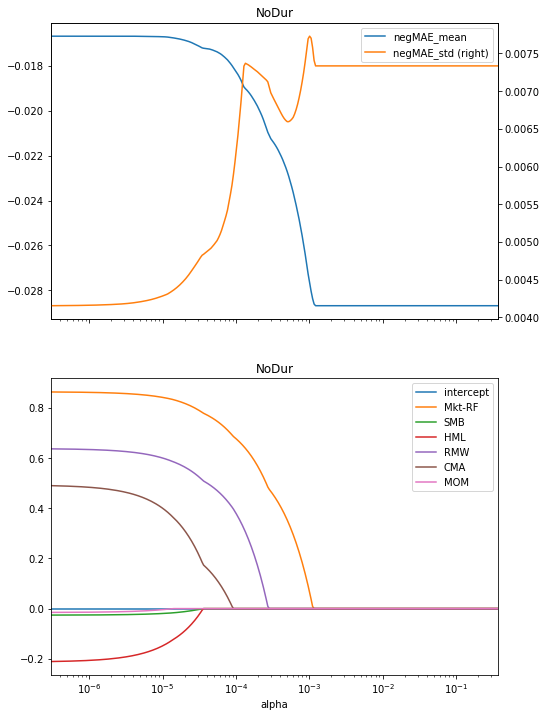

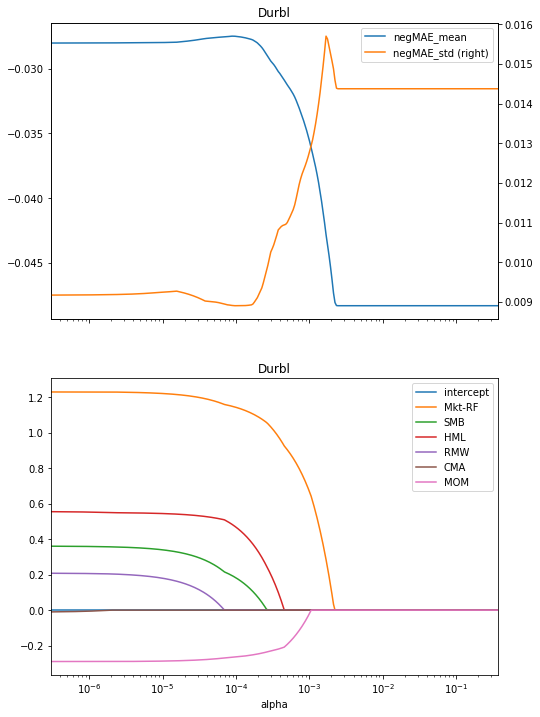

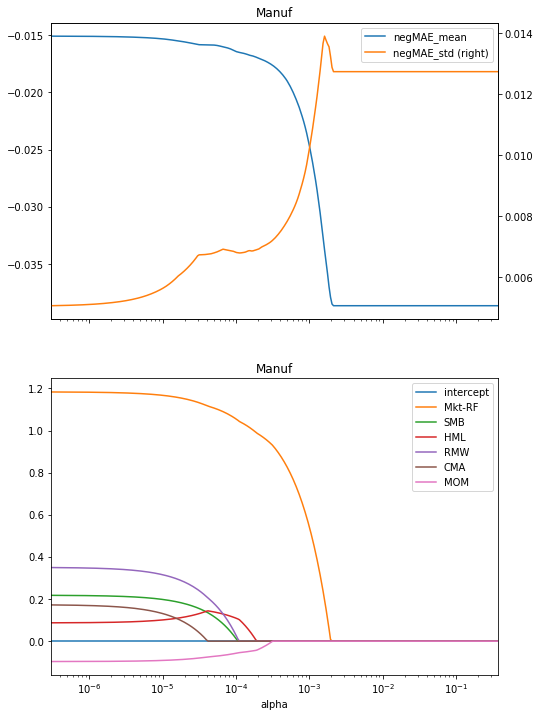

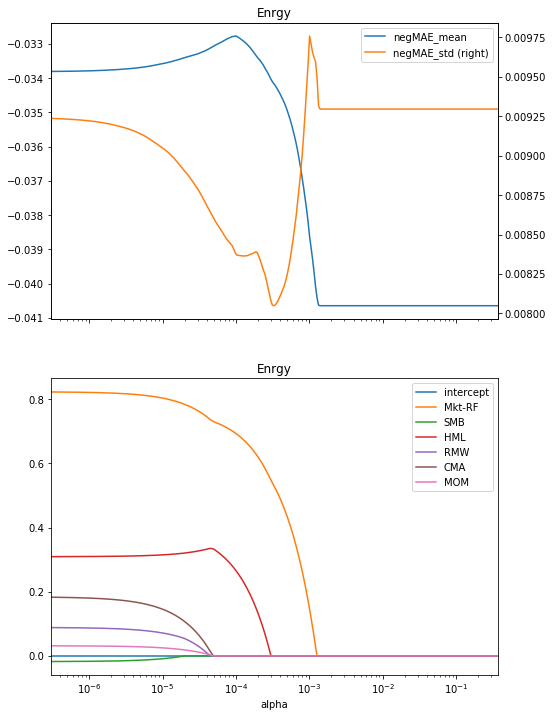

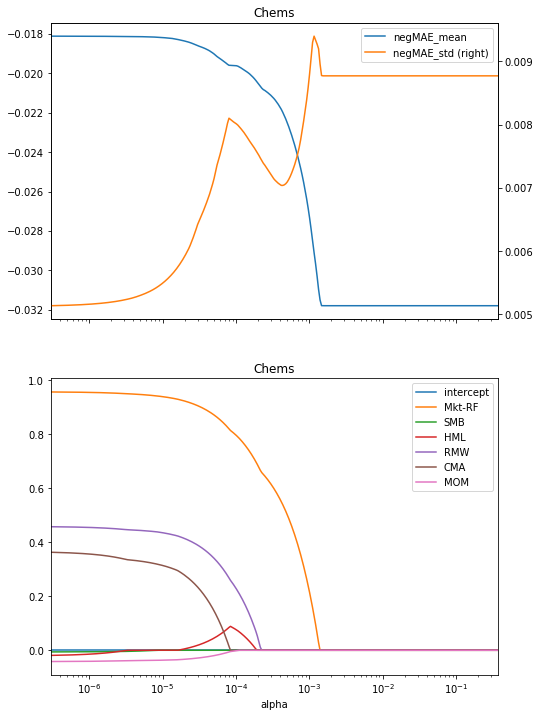

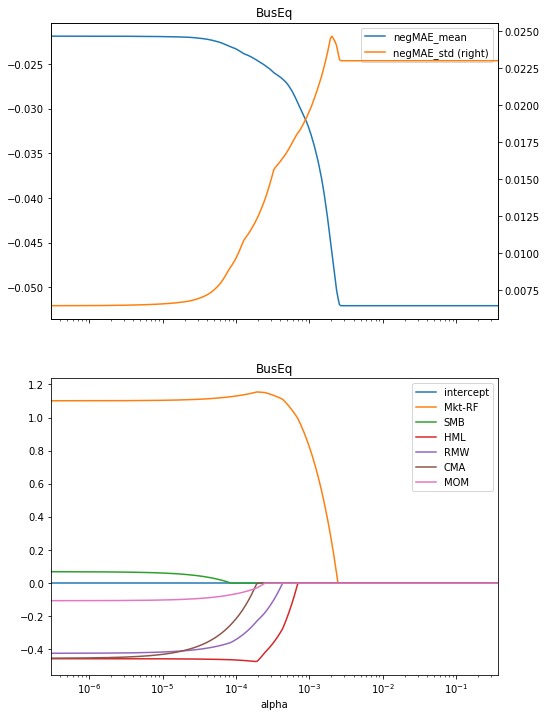

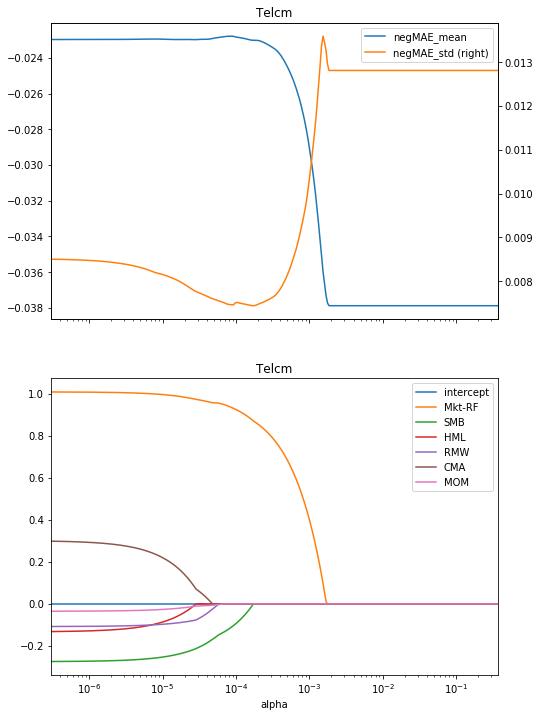

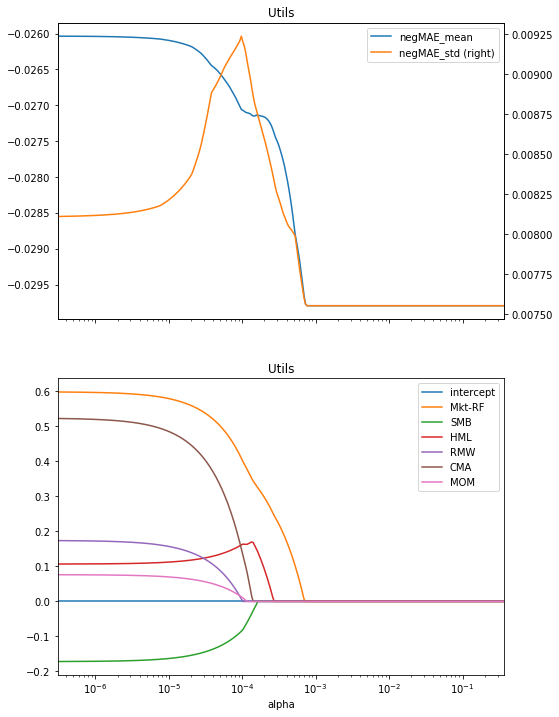

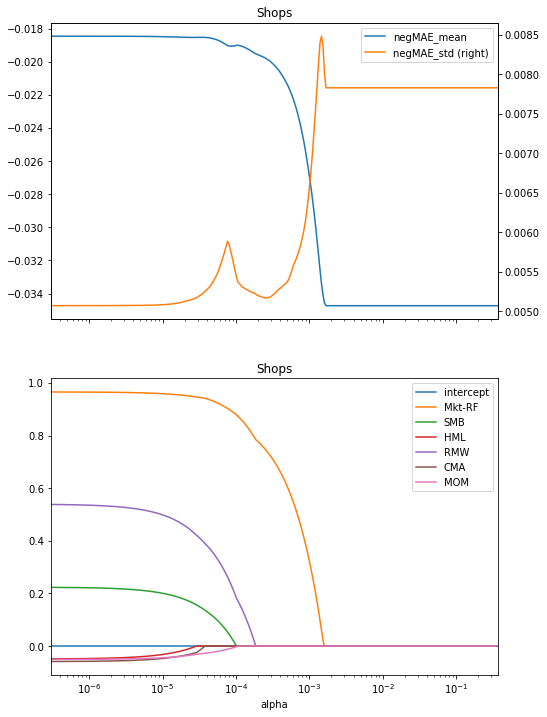

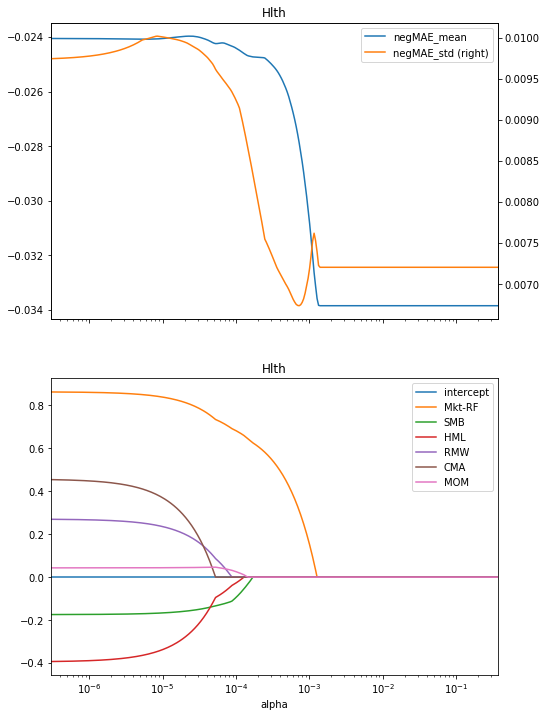

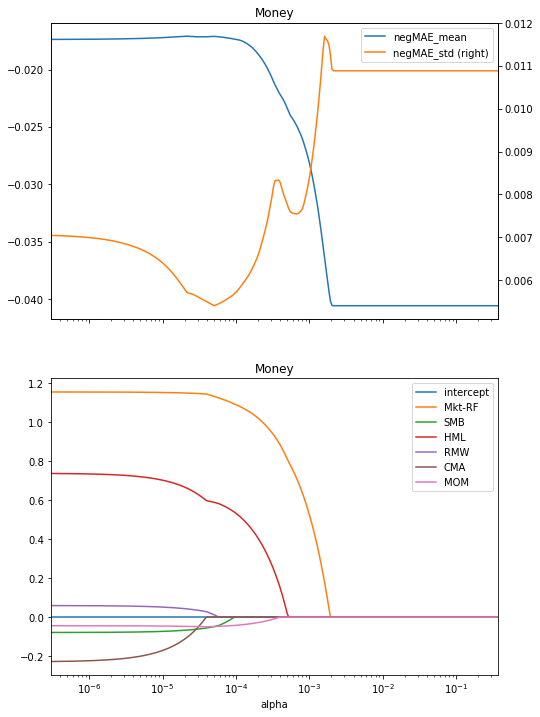

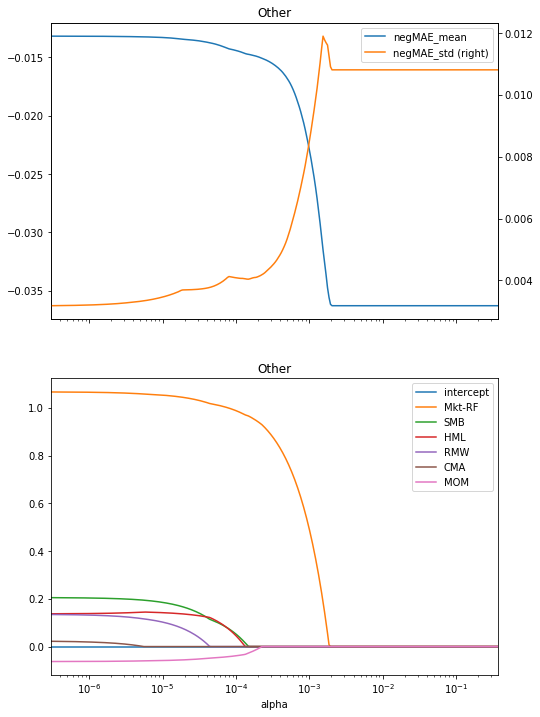

In [4]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api  as sm
import numpy as np
import pickle

### take 1 min to run 

# tmp_X= sm.add_constant( factor_ret6)
# ALPHA= np.exp( np.linspace(start= -15, stop= -1, num= 300)) # penalty multiplier 
# industry_cv= {}
# K =10 
# i=0 
# for ind in industry_ret.columns:
#     y= industry_ret[ind]- RF
#     cv_scores= {} # cv scores array
#     cv_res= [] # alpha, score mean, score std
#     cv_params= [] # alpha, estimated betas 
    
    
#     for alpha in ALPHA: 
#         lasso_model= Lasso( alpha= alpha)
#         scores= cross_val_score( lasso_model, X= tmp_X, y = y , cv=K, scoring= 'neg_mean_absolute_error' )
#         cv_scores[ alpha]= scores
#         cv_res.append( [ alpha, np.mean(scores), np.std(scores)])
#         lasso_model.fit( X=tmp_X, y=y)
#         cv_params.append( [alpha]+ lasso_model.coef_.tolist( ))
    
#     cv_res= pd.DataFrame(cv_res)
#     cv_res.columns= ['alpha', 'negMAE_mean', 'negMAE_std']
#     cv_res.set_index( keys= 'alpha', inplace= True)
#     cv_params= pd.DataFrame( cv_params)
#     cv_params.columns=  ['alpha', 'intercept']+ tmp_X.columns[1: ].tolist()
#     cv_params.set_index( keys= 'alpha', inplace= True)
    
#     industry_cv[ind]= (cv_scores, cv_res, cv_params)
    
# pickle.dump( industry_cv, open( 'industry_cv.p', 'wb'))

industry_cv= pickle.load( open('industry_cv.p', 'rb'))


for ind in industry_ret.columns: 
    g= plt.figure(figsize=(8,12))
    plt.subplot(211)
    industry_cv[ind][1] .plot(secondary_y = ['negMAE_std'],  logx= True, ax=plt.subplot(2,1, 1))
    plt.title( ind)
    industry_cv[ind][2].plot(logx=True, ax= plt.subplot(2,1,2))
    plt.title( ind)
    
    fig_dic[ind+ '_lasso']= g 

Based on the cross validation result, the concise model for each industry is developed. Below is the significant factor and exposures for each industry. 

In [5]:
industry_factor= {}
industry_factor['Telcm']= ['Mkt-RF', 'SMB']
industry_factor['BusEq']= ['Mkt-RF', 'HML', 'MOM', 'CMA', 'RMW', 'SMB']
industry_factor['NoDur']= ['Mkt-RF', 'RMW', 'CMA', 'HML']
industry_factor['Shops']= ['Mkt-RF', 'RMW', 'SMB', 'HML', 'MOM']
industry_factor['Durbl']= ['Mkt-RF', 'HML', 'SMB', 'RMW', 'MOM']
industry_factor['Hlth']=  ['Mkt-RF', 'MOM', 'SMB', 'HML']
industry_factor['Utils']= ['Mkt-RF', 'HML', 'RMW', 'MOM', 'SMB']
industry_factor['Chems']=['Mkt-RF', 'RMW', 'CMA']
industry_factor['Money']= factor_ret6.columns.tolist()
industry_factor['Manuf']= ['Mkt-RF', 'MOM', 'HML', 'SMB', 'RMW']
industry_factor['Enrgy']=['Mkt-RF', 'HML']
industry_factor['Other']= ['Mkt-RF', 'HML', 'SMB', 'MOM']

pickle.dump( industry_factor, open( 'industry_factor.p', 'wb') )

## Use the full history to fit longterm model 
industry_longtermModel= {}
for ind in industry_ret.columns:
    y= industry_ret[ind]-RF
    tmpX= factor_ret6[ industry_factor[ind]]
    lm= sm.OLS(exog= tmpX, endog= y)
    lm_res= lm.fit()
    industry_longtermModel[ind]= lm_res
    
pickle.dump( industry_longtermModel, open('industry_longtermModel.p', 'wb'))

## extract and organize longterm beta estimation and std
industry_longtermBeta= pd.DataFrame()
industry_longtermBetaStd= pd.DataFrame()
for key, val in industry_longtermModel.items():
    beta= pd.DataFrame( val.params) 
    beta.columns= [key]
    industry_longtermBeta= pd.concat( [industry_longtermBeta, beta], axis=1, join= 'outer')
    betastd= pd.DataFrame( val.bse)
    betastd.columns= [key]
    industry_longtermBetaStd= pd.concat([industry_longtermBetaStd, betastd], axis=1, join= 'outer')

pickle.dump(industry_longtermBeta, open('industry_longtermBeta.p', 'wb'))
pickle.dump(industry_longtermBetaStd, open( 'industry_longtermBetaStd.p', 'wb'))

industry_longtermBeta

,Other,BusEq,Shops,NoDur,Money,Chems,Manuf,Utils,Durbl,Enrgy,Telcm,Hlth
CMA,NaN,-0.397859,NaN,0.473476,-0.241637,0.332491,NaN,NaN,NaN,NaN,NaN,NaN
HML,0.168935,-0.469794,-0.078569,-0.199956,0.740830,NaN,0.166198,0.357876,0.540375,0.402924,NaN,-0.105531
MOM,-0.065915,-0.092778,-0.056200,NaN,-0.047346,NaN,-0.090351,0.110042,-0.303012,NaN,NaN,0.091264
Mkt-RF,1.028668,1.140026,0.971342,0.861763,1.147278,0.953915,1.153732,0.533225,1.207891,0.770650,0.999297,0.780272
RMW,NaN,-0.375944,0.542399,0.643235,0.049213,0.443190,0.322998,0.125428,0.178055,NaN,NaN,NaN
SMB,0.160757,0.084949,0.220936,NaN,-0.082626,NaN,0.218536,-0.156848,0.347779,NaN,-0.222141,-0.234340


Above is the long-term factor exposure for each industry. Below is the standard deviation of the estimator. 

In [6]:
industry_longtermBetaStd

,Other,BusEq,Shops,NoDur,Money,Chems,Manuf,Utils,Durbl,Enrgy,Telcm,Hlth
CMA,NaN,0.100649,NaN,0.076142,0.079578,0.064092,NaN,NaN,NaN,NaN,NaN,NaN
HML,0.031882,0.072205,0.044311,0.052997,0.057089,NaN,0.037496,0.066031,0.070421,0.075512,NaN,0.057443
MOM,0.020143,0.032671,0.026427,NaN,0.025831,NaN,0.022362,0.039381,0.041999,NaN,NaN,0.036293
Mkt-RF,0.022758,0.039367,0.030748,0.030081,0.031126,0.032643,0.026018,0.045819,0.048866,0.052562,0.037337,0.041005
RMW,NaN,0.068633,0.056082,0.048180,0.054265,0.050132,0.047456,0.083572,0.089127,NaN,NaN,NaN
SMB,0.030491,0.053002,0.043663,NaN,0.041906,NaN,0.036947,0.065065,0.069390,NaN,0.052201,0.054938


T-stats validates the significance of  estimators: 

In [7]:
industry_longtermBeta/industry_longtermBetaStd

,Other,BusEq,Shops,NoDur,Money,Chems,Manuf,Utils,Durbl,Enrgy,Telcm,Hlth
CMA,NaN,-3.952951,NaN,6.218319,-3.036481,5.187729,NaN,NaN,NaN,NaN,NaN,NaN
HML,5.298823,-6.506412,-1.773114,-3.772959,12.976763,NaN,4.432473,5.419772,7.673474,5.335884,NaN,-1.837127
MOM,-3.272385,-2.839778,-2.126581,NaN,-1.832881,NaN,-4.040331,2.794282,-7.214749,NaN,NaN,2.514674
Mkt-RF,45.199514,28.958849,31.590619,28.648362,36.859498,29.222640,44.343000,11.637513,24.718691,14.661641,26.764544,19.028549
RMW,NaN,-5.477636,9.671546,13.350693,0.906910,8.840511,6.806298,1.500849,1.997762,NaN,NaN,NaN
SMB,5.272256,1.602756,5.060081,NaN,-1.971693,NaN,5.914906,-2.410643,5.011942,NaN,-4.255495,-4.265535


##### Rolling Beta


To capture the beta dynamics, a set of rolling weighted least square regressions(WLS) are fitted in each Feb end from 1996 to 2017. The weight is given to recent data, and exponentially decays with window_size 200 periods. The updated betas are used to explain the following 12 months industry portfolio returns. The comparation of out of sample MAE error suggests that the concise model gives more robust explanation than others . 

In [115]:
##  rolling fitting 

from rolling import rolling_reg

break_index= [str(x)+ '-03-01' for x in range( 1996, 2018,1)]
# window_size controls the decay rate in WLS in rolling_reg. 
# The weight decayed exponentially with rate= window_size 
# offline cv suggests window_size =200
window_size= 200

X1= factor_ret6 # 6 factor 
X2= factor_ret6[['Mkt-RF', 'HML', 'SMB', 'MOM']] # 4 factor 

M1_rollingModel= {}
M2_rollingModel= {}
M3_rollingModel= {} # key is industry, val is dict mapping break index to rolling model


for ind in industry_ret.columns:
    y= industry_ret[ ind]-RF
    M1_rollingModel[ind]= rolling_reg( X= X1, y=y, window_size= window_size, rolling_index= break_index)
    M2_rollingModel[ind]= rolling_reg( X= X2, y=y, window_size= window_size, rolling_index= break_index)
    X3= factor_ret6[ industry_factor[ ind]]
    M3_rollingModel[ind]= rolling_reg( X= X3, y=y, window_size= window_size, rolling_index= break_index)
    
pickle.dump( M1_rollingModel, open( 'M1_rollingModel.p', 'wb'))
pickle.dump( M2_rollingModel, open( 'M2_rollingModel.p', 'wb'))
pickle.dump( M3_rollingModel, open( 'M3_rollingModel.p', 'wb'))

## rolling prediction  

from rolling import rolling_forecast
M1_rollingPred= {}
M2_rollingPred= {}
M3_rollingPred= {}
X1= factor_ret6
X2= factor_ret6[['Mkt-RF', 'HML', 'SMB', 'MOM']]

pred_OOS= {}
for ind in industry_ret.columns:
    pred_oos= {}
    y= industry_ret[ind]-RF
    
    ycap_M1= rolling_forecast( X= X1, rolling_model= M1_rollingModel[ind])
    ycap_M2= rolling_forecast( X= X2, rolling_model= M2_rollingModel[ind])
    X3= factor_ret6[industry_factor[ ind]]
    ycap_M3= rolling_forecast( X= X3, rolling_model= M3_rollingModel[ind])
    
    pred_oos['y']= y.loc[ ycap_M1.index].tolist()
    pred_oos['ycap_M1']= ycap_M1.tolist()
    pred_oos['ycap_M2']= ycap_M2.tolist()
    pred_oos['ycap_M3']= ycap_M3.tolist()
    
    pred_oos= pd.DataFrame( pred_oos, index= ycap_M1.index)
    pred_OOS[ind]= pred_oos
    

    
## Model comparation 

ModelMAE_OOS= {}
for ind, val in pred_OOS.items():
    ModelMAE_OOS[ind]= [ metrics.mean_absolute_error( y_true= val['y'], y_pred= val['ycap_M1']),
                       metrics.mean_absolute_error( y_true= val['y'], y_pred= val['ycap_M2']),
                       metrics.mean_absolute_error( y_true= val['y'], y_pred= val['ycap_M3'])]
    
ModelMAE_OOS= pd.DataFrame( ModelMAE_OOS, index= ['rolling_M1', 'rolling_M2', 'rolling_M3'])
ModelMAE_OOS

,BusEq,Chems,Durbl,Enrgy,Hlth,Manuf,Money,NoDur,Other,Shops,Telcm,Utils
rolling_M1,0.021917,0.019197,0.028805,0.037887,0.025443,0.016026,0.017378,0.017272,0.013881,0.018823,0.025597,0.029230
rolling_M2,0.022553,0.020053,0.028979,0.036373,0.024879,0.017279,0.017574,0.020944,0.013582,0.020811,0.024466,0.029350
rolling_M3,0.021917,0.018381,0.028862,0.035616,0.024879,0.015962,0.017378,0.017086,0.013582,0.018592,0.023340,0.029115


M3 (the concise model) has out of sample MAE no larger than FF 6 factor/ 4 factor model over all 12 industries. 

Below is the rolling beta evolution of concise model. 

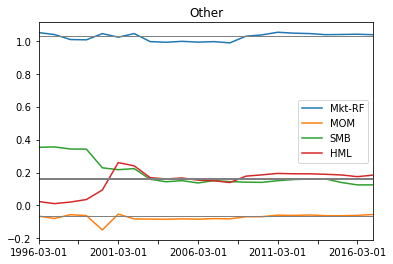

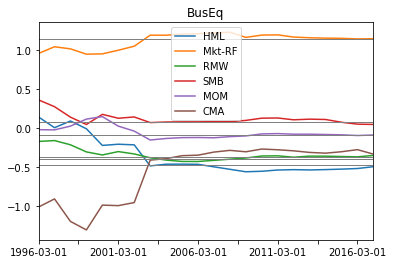

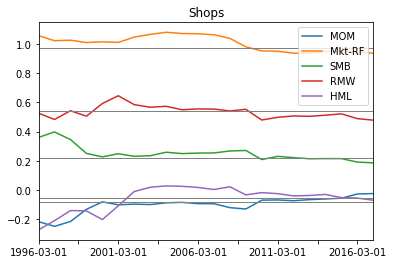

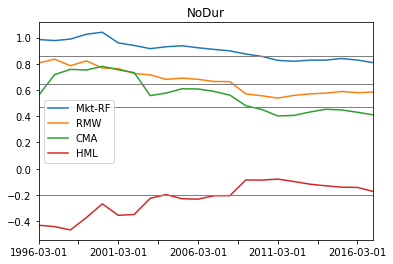

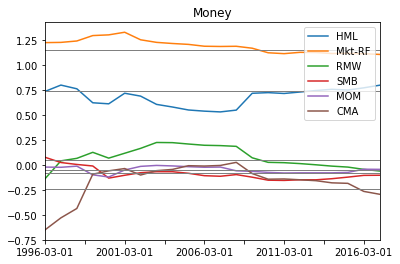

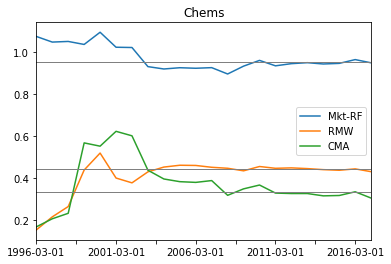

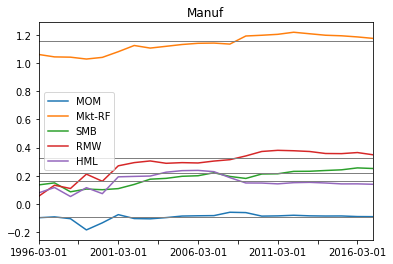

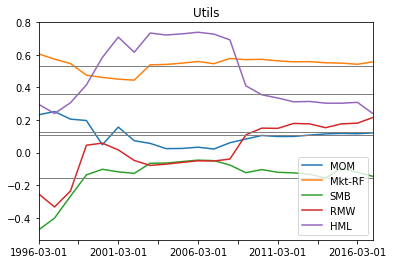

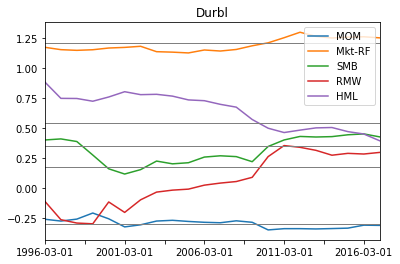

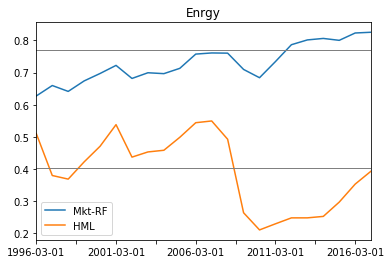

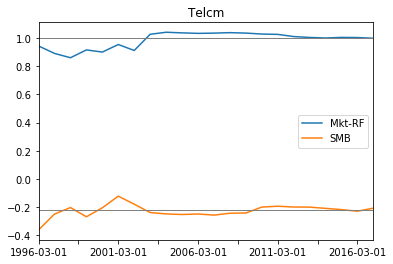

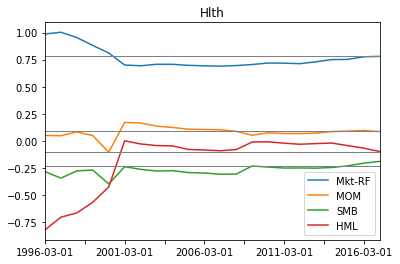

In [116]:
industry_rollingBeta= {}
industry_rollingBetaStd= {}

for key, val in M3_rollingModel.items( ):
    
    tmp = pd.concat( [pd.DataFrame(x.params.tolist() + [x.rsquared ,np.mean(np.abs(x.resid))], 
                                   columns=[k],
                                  index= x.params.index.tolist()+ ['R_SQ','MAE']) for k ,x in val.items()], axis= 1 )
    tmp2= pd.concat( [pd.DataFrame( x.bse.tolist(), 
                                   columns=[k], 
                                   index= x.bse.index.tolist())  for k ,x in val.items()], axis =1)
    
    
    tmp= tmp.T
    tmp.sort_index(inplace=True ) 
    
    tmp2= tmp2.T
    tmp2.sort_index( inplace= True)
    g= plt.figure()
    plt.subplot(111)
    tmp[list(set(tmp.columns )- set( ('MAE', 'R_SQ')))].plot(ax=plt.subplot(1,1,1) )
    M= industry_longtermModel[key]
    for f in M.params.index:
        plt.axhline( y= M.params[f], lw= 1, color= 'grey')
    plt.title( key)
    fig_dic[key+'_rollingBeta']= g
    tmp['LABEL']= key
    tmp['DATE']= tmp.index
    industry_rollingBeta[key]= tmp    
    industry_rollingBetaStd[key]= tmp2
    
pickle.dump( industry_rollingBetaStd, open( 'industry_rollingBetaStd.p', 'wb'))
pickle.dump( industry_rollingBeta, open('industry_rollingBeta.p', 'wb'))


industry_rollingLoading= {}
for k ,val in industry_rollingBeta.items():
    industry_rollingLoading[k]= val[industry_factor[k]]
pickle.dump(industry_rollingLoading, open('industry_rollingLoading.p', 'wb'))

#####  Constant Beta Vs Varying(rolling) Beta

Compare the rolling out of sample MAE and constant beta out of sample MAE. 

In [117]:
M1_MAE= {}
M2_MAE= {}
M3_MAE= {}

est_date= '1996-03-01'

M1_const= {}
M2_const={}
M3_const={}

for ind in industry_ret.columns:
    M1_const[ind]= M1_rollingModel[ind][est_date]
    M2_const[ind]= M2_rollingModel[ind][est_date]
    M3_const[ind]= M3_rollingModel[ind][est_date]
    
X1= factor_ret6 # 6 factor 
X2= factor_ret6[['Mkt-RF', 'HML', 'SMB', 'MOM']] # 4 factor 
X1= X1.iloc[X1.index>= est_date]
X2= X2.iloc[X2.index>= est_date]

ModelMAE_OOS_const= {}

for ind in industry_ret.columns:
    X3= factor_ret6[ industry_factor[ ind]]
    X3= X3.iloc[X3.index>= est_date]
    y= industry_ret[ind]- RF
    y= y.iloc[ y.index>= est_date]
    
    y_pred_M1= M1_const[ind].predict( exog= X1)
    y_pred_M2= M2_const[ind].predict( exog= X2)
    y_pred_M3= M3_const[ind].predict( exog= X3)
    
    ModelMAE_OOS_const[ind]= [metrics.mean_absolute_error( y_true= y, y_pred=y_pred_M1),
                             metrics.mean_absolute_error(y_true= y, y_pred= y_pred_M2),
                             metrics.mean_absolute_error(y_true= y, y_pred= y_pred_M3)]
    
    

ModelMAE_OOS_const= pd.DataFrame( ModelMAE_OOS_const, index= ['const_M1', 'const_M2', 'const_M3'])
    
    

In [133]:
pd.concat( [ModelMAE_OOS, ModelMAE_OOS_const], axis= 0)

,BusEq,Chems,Durbl,Enrgy,Hlth,Manuf,Money,NoDur,Other,Shops,Telcm,Utils
rolling_M1,0.021917,0.019197,0.028805,0.037887,0.025443,0.016026,0.017378,0.017272,0.013881,0.018823,0.025597,0.029230
rolling_M2,0.022553,0.020053,0.028979,0.036373,0.024879,0.017279,0.017574,0.020944,0.013582,0.020811,0.024466,0.029350
rolling_M3,0.021917,0.018381,0.028862,0.035616,0.024879,0.015962,0.017378,0.017086,0.013582,0.018592,0.023340,0.029115
const_M1,0.025478,0.021303,0.030072,0.039608,0.033619,0.016885,0.020536,0.018314,0.014981,0.020902,0.025554,0.031471
const_M2,0.024418,0.022308,0.029735,0.037479,0.029253,0.017196,0.020180,0.025315,0.014644,0.027041,0.026571,0.029694
const_M3,0.025478,0.020254,0.029751,0.036321,0.029253,0.016810,0.020536,0.017965,0.014644,0.020923,0.023698,0.030810


The rolling version has smaller OOS MAE compared to constant version, cross all industries and models. It implies the varing beta has more explaination power than constant beta. 

#### A3.Dynamic Beta Estimation 
    
    
    
** Out of Sample Filtering**

One attemp to filter the volatile rolling beta without future information is made in this section. Beta is assumed to be mean reverted, following OU process. It is a reasonable assumption while the implmentation is tricky. The filtering result shows high sensitivity to the OU parameter estimation (the long term mean and convergence rate), while it needs good luck to just hit the most 'representative' period so to get a good estimation. The filtering looks good for most industries and factors, but does fail over in some cases (eg Utility). 

In [134]:
from OU_process import OU_smoothing

OU_est_date= '2006-03-01'

industry_rollingLoading_OUSmoothed= {}
industry_OUfitted= {}

for ind, val  in industry_rollingLoading.items():  
    beta_fittedModel= {}
    beta_smoothed= {} # key is factor name 
    
    for f in val.columns: 
        tmp_series= pd.concat([val[f], industry_rollingBetaStd[ind][f]], axis =1)
        tmp_series.columns= ['value', 'std']
        OU_res= OU_smoothing(series= tmp_series, est_date=OU_est_date)
        beta_fittedModel[ f]= OU_res[ 'OU_fitted']
        beta_smoothed[ f]= OU_res['OU_smoothed_res']['OU_smoothed_obs']

        
    
    
    industry_rollingLoading_OUSmoothed[ind]= pd.DataFrame( beta_smoothed)
    industry_OUfitted[ ind]= beta_fittedModel
    
    
pickle.dump( industry_rollingLoading_OUSmoothed, open( 'industry_rollingLoading_OUSmoothed.p', 'wb'))
pickle.dump( industry_OUfitted, open( 'industry_OUfitted.p', 'wb'))

/Users/Eric/FF_IndustryFactorExposure/OU_process.py:18: RuntimeWarning: invalid value encountered in log
  lam= - np.log(a)
/Users/Eric/FF_IndustryFactorExposure/OU_process.py:20: RuntimeWarning: invalid value encountered in log
  sigma= resid_std* np.sqrt( -2* np.log(a)/(1-a*a))


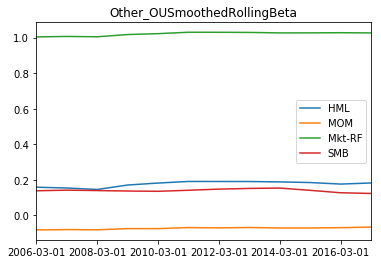

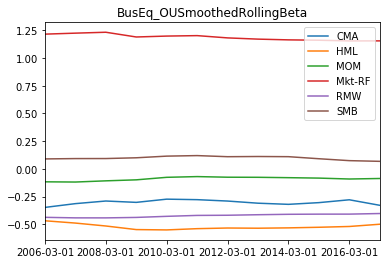

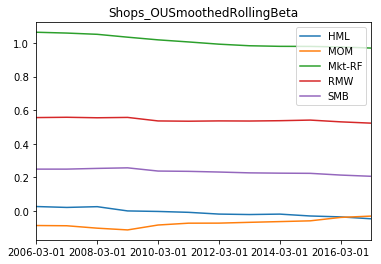

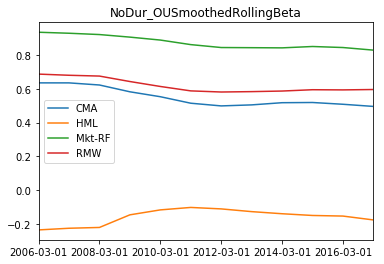

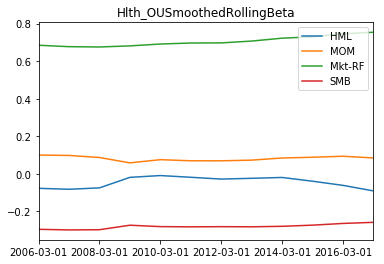

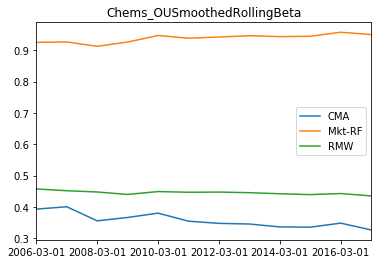

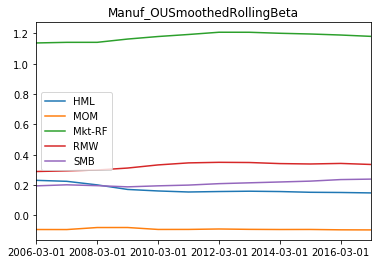

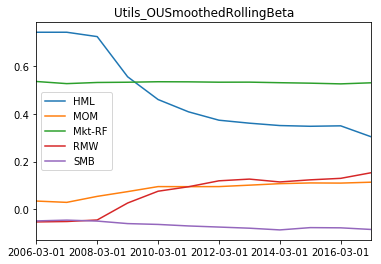

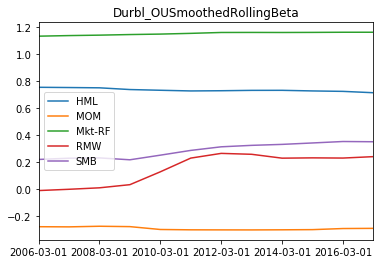

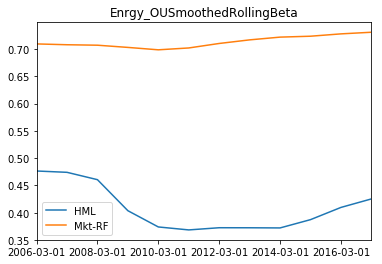

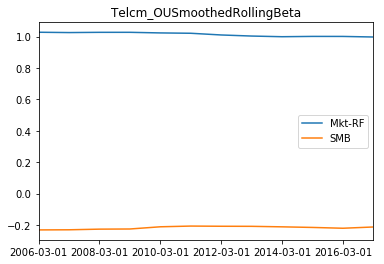

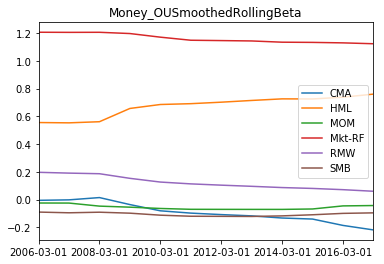

In [135]:
for ind, val in industry_rollingLoading_OUSmoothed.items():
    val.plot(title= ind+ '_OUSmoothedRollingBeta')

**In Sample Smoothing**

The in sample smoothing is relatively easy. The rolling beta can be thought as noisy observation of true beta, which is also distribution. Since it is an in-sample smoothing task, the longterm beta estimation and variance can be used as initial guess (the prior), and for each observation, the value and variance are used to update prior to posterior. Here the prior distribution and likelihood function is assumed to be Normal to utilize Gaussian Conjugate pair. The plot confirms an effective in-sample smoothing. 

Since the long term beta, which is estimated using future information, is incorporated for each smoothing, there should be not surprised to find a samller MAE for the smoothed rolling beta. 


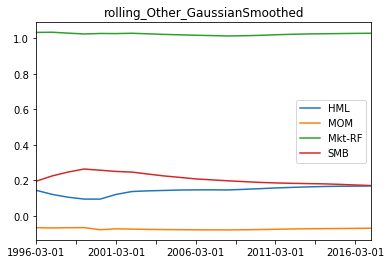

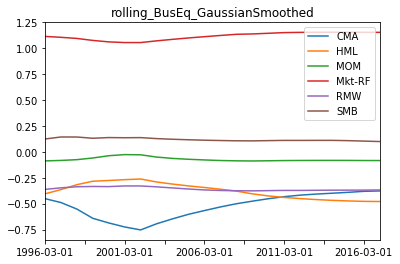

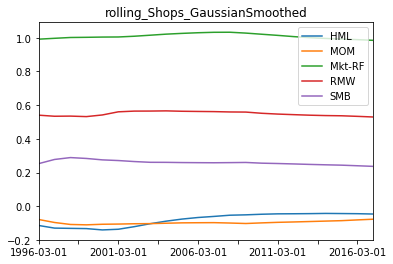

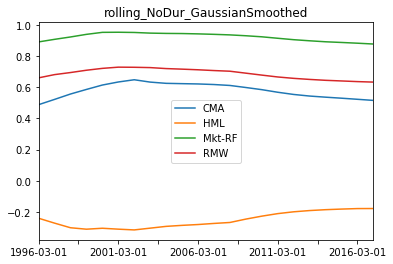

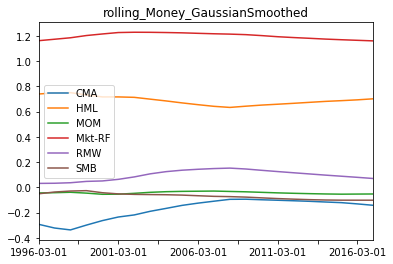

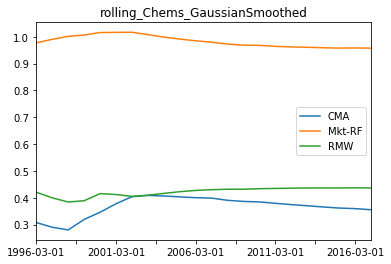

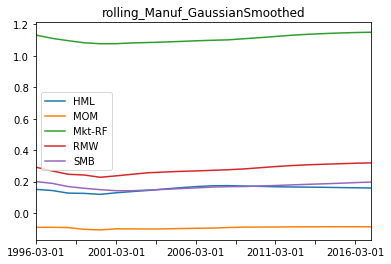

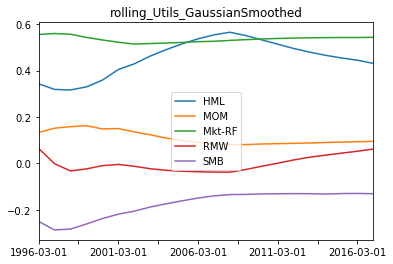

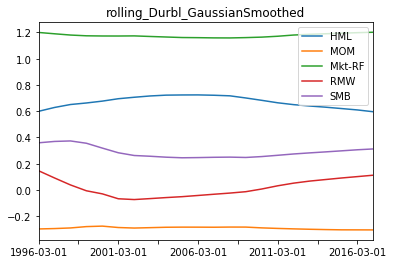

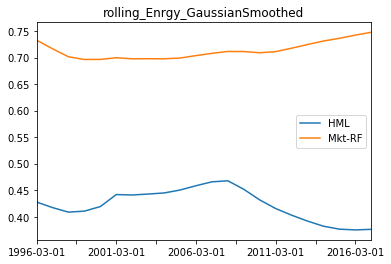

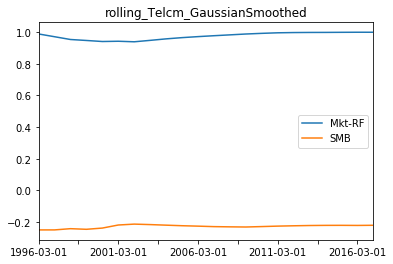

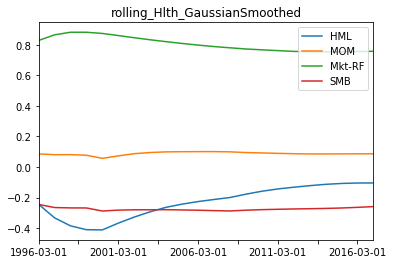

In [136]:
from bayessian_univariate import gaussian_smooth

r_beta= industry_rollingLoading
r_beta_std= industry_rollingBetaStd
l_beta= industry_longtermBeta
l_beta_std= industry_longtermBetaStd
r_beta_smoothed= {}
r_beta_std_smoothed= {}

for ind in industry_ret.columns:
    
    beta_smoothed= {}
    beta_std_smoothed={}
    
    for f in r_beta[ind].columns:
        X= pd.concat([r_beta[ind][f], r_beta_std[ind][f]**2], axis=1)
        prior_m= l_beta[ind][f]
        prior_var= l_beta_std[ind][f]**2
        [b_smoothed, b_var_smoothed]= gaussian_smooth( prior_mean= prior_m, prior_var= prior_var, X=X)
        beta_smoothed[f]= b_smoothed
        beta_std_smoothed[f]= np.sqrt(b_var_smoothed)
        
    
    r_beta_smoothed[ind]= pd.DataFrame(beta_smoothed)
    r_beta_std_smoothed[ind]= pd.DataFrame(beta_std_smoothed)

pickle.dump(r_beta_smoothed, open('r_beta_smoothed.p', 'wb'))
pickle.dump(r_beta_std_smoothed, open( 'r_beta_std_smoothed', 'wb'))

for ind, df in r_beta_smoothed.items():
    g= plt.figure()
    plt.subplot(111)
    df.plot(title= 'rolling_'+ind+'_GaussianSmoothed', ax= plt.subplot(111))
    fig_dic[ind+'_GaussianSmoothed']= g
    

#### A4. Industry Grouping: LDA and KMeans 


The rolling regression results are used as sample of industry portfolio characteristics. 

In [137]:
industry_features= pd.concat( [v for k,v in industry_rollingBeta.items() ], axis= 0)
industry_features.fillna( value=0, inplace= True)
industry_features.sort_values( by= [ 'LABEL', 'DATE'], inplace =True)
industry_features.set_index( keys=['LABEL'], inplace=True)
del industry_features['DATE']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
industry_features_normalized= (industry_features- industry_features.mean())/ industry_features.std()
lda= LDA()
lda.fit( X= industry_features_normalized, 
       y= industry_features.index)
industry_features_lda= pd.DataFrame(lda.transform(  industry_features_normalized  ), 
                                    index= industry_features_normalized.index)


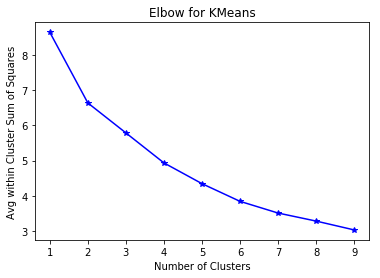

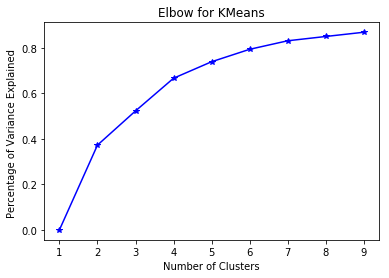

NoDur   [0]
Durbl   [2]
Manuf   [0]
Enrgy   [1]
Chems   [0]
BusEq   [3]
Telcm   [1]
Utils   [1]
Shops   [0]
Hlth   [1]
Money   [2]
Other   [0]


In [138]:
## Kmeans

# Elbow plot 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
K= range( 1,10)

tmp_data= industry_features_lda
KM= [ KMeans(n_clusters= k, n_init=500).fit(tmp_data) for k in K]
centroids= [ k.cluster_centers_ for k in KM]
D_k= [cdist(tmp_data ,cent , 'euclidean') for cent in centroids]
cIdx= [np.argmax( D, axis =1) for D in D_k]
dist= [np.min(D, axis= 1) for D in D_k]
avgWithinSS= [sum(d)/ tmp_data.shape[0] for d in dist]

wcss= [sum(d**2) for d in dist]
tss= sum(pdist(tmp_data)**2)/ tmp_data.shape[0]
bss= tss- wcss

fig= plt.figure()
ax= fig.add_subplot( 111)
ax.plot( K, avgWithinSS, 'b*-')
plt.xlabel( 'Number of Clusters')
plt.ylabel('Avg within Cluster Sum of Squares')
plt.title( 'Elbow for KMeans')
fig_dic['KM_elbow_1']= fig

fig= plt.figure()
ax= fig.add_subplot(111)
ax.plot(K, bss/tss, 'b*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of Variance Explained ')
plt.title('Elbow for KMeans')
fig_dic['KM_elbow_2']= fig
plt.show()

## elbow plot suggests 4 centroids 

kmeans= KMeans( n_clusters= 4, n_init= 1000).fit( industry_features_lda[[0,1,2]].values)
industry_features_lda['Group']= kmeans.labels_


for ind in industry_ret.columns:
    print( ind+ '   '+ str( np.unique( industry_features_lda.loc[ind,'Group'])))
    

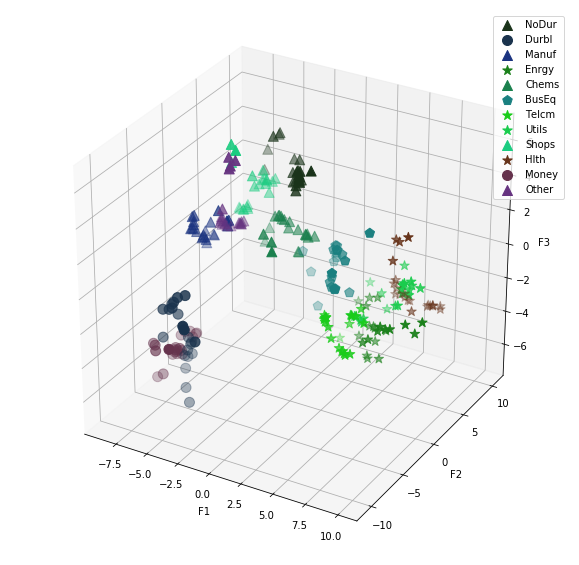

In [139]:
## plot LDA first 3 dim 

from  mpl_toolkits.mplot3d  import Axes3D

SuperSector={'A': ['Money', 'Durbl'],
             'B': ['NoDur', 'Manuf', 'Chems', 'Shops', 'Other'],
             'C': ['Enrgy', 'Telcm', 'Utils', 'Hlth'],
             'D': ['BusEq']}

color_list= [ (x, y, z) 
             for x in np.linspace( 0.1, 0.7, 3) 
             for y in np.linspace (0.2, 0.8, 3) 
             for z in np.linspace( 0.1, 0.5, 3) ]
i=0
fig= plt.figure(figsize= (10,10))
ax= fig.add_subplot(111, projection= '3d')
%matplotlib inline 

for ind in industry_ret.columns:

#     if(ind== 'BusEq'):
#         continue
    tmp= industry_features_lda.loc[ind]
    F1= tmp[0].tolist()
    F2= tmp[1].tolist()
    F3= tmp[2].tolist()
    
    marker= ''
    if (ind in SuperSector['A']): 
        marker= 'o'
    elif ( ind in SuperSector['B']):
        marker= '^'
    elif (ind in SuperSector['C']) :
        marker= '*'
    else: 
        marker= 'p'
        
    ax.scatter( F1, F2, F3, c= color_list[i], marker= marker, s= 100, label= ind)
    
    ax.set_xlabel( 'F1')
    ax.set_ylabel('F2')
    ax.set_zlabel('F3')
    ax.legend()
    i+=1

plt.show()
fig_dic['Industry_Grouping_3d_1']= fig 
fig

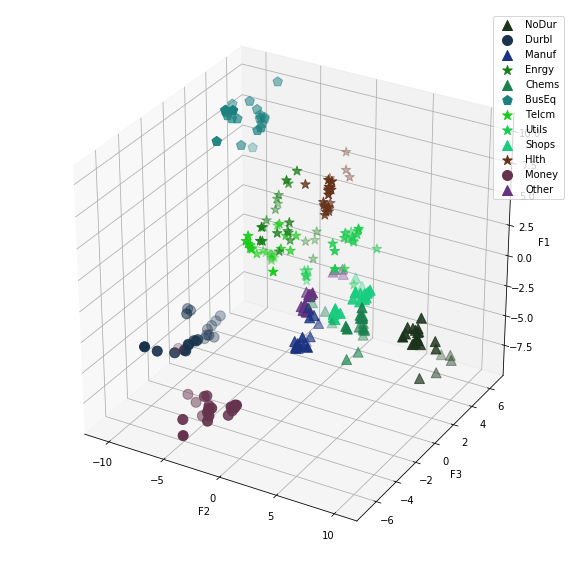

In [140]:
## change plot view direction. The plot supports BusEq to be seperated. 

SuperSector={'A': ['Money', 'Durbl'],
             'B': ['NoDur', 'Manuf', 'Chems', 'Shops', 'Other'],
             'C': ['Enrgy', 'Telcm', 'Utils', 'Hlth'],
             'D': ['BusEq']}

color_list= [ (x, y, z) 
             for x in np.linspace( 0.1, 0.7, 3) 
             for y in np.linspace (0.2, 0.8, 3) 
             for z in np.linspace( 0.1, 0.5, 3) ]
i=0
fig= plt.figure(figsize= (10,10))
ax= fig.add_subplot(111, projection= '3d')
%matplotlib inline 

for ind in industry_ret.columns:

    tmp= industry_features_lda.loc[ind]
    F1= tmp[0].tolist()
    F2= tmp[1].tolist()
    F3= tmp[2].tolist()
    
    marker= ''
    if (ind in SuperSector['A']): 
        marker= 'o'
    elif ( ind in SuperSector['B']):
        marker= '^'
    elif (ind in SuperSector['C']) :
        marker= '*'
    else: 
        marker= 'p'
        
    ax.scatter( F2, F3, F1, c= color_list[i], marker= marker, s= 100, label= ind)
    
    ax.set_xlabel( 'F2')
    ax.set_ylabel('F3')
    ax.set_zlabel('F1')
    ax.legend()
    i+=1

plt.show()
fig_dic['Industry_Grouping_3d_2']= fig 
fig

#### A5. Portfolio Construction and Rebalancing: Min Variance and Equal Weight 

Two long only and fully invested portfolios :


P1. The portfolio with variance minimized and no SuperSector claiming weights more than 50% 

P2. Equal weight portfolio over 12 industries 


Both get initialized on 1995-01-01. For P2, the target weight is constant, 1/12 for each industry, while the target weight of P1 depends on covariance matrix estimation. Here the target weight of P1 gets recalculated every 5 year (at 2000-01-01, 2005-01-01, 2010-01-01 and 2015-01-01). Each time the covariance matrix is re-estimated based on all past history at that time point.

In [141]:
SuperSector

{'A': ['Money', 'Durbl'],
 'B': ['NoDur', 'Manuf', 'Chems', 'Shops', 'Other'],
 'C': ['Enrgy', 'Telcm', 'Utils', 'Hlth'],
 'D': ['BusEq']}

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0004247271069001251
            Iterations: 56
            Function evaluations: 56
            Gradient evaluations: 56
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0004520761562004712
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0005236807605996255
            Iterations: 83
            Function evaluations: 83
            Gradient evaluations: 83
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0005593648060249534
            Iterations: 58
            Function evaluations: 58
            Gradient evaluations: 58
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.0005371059558973536
            Iterations: 61
    

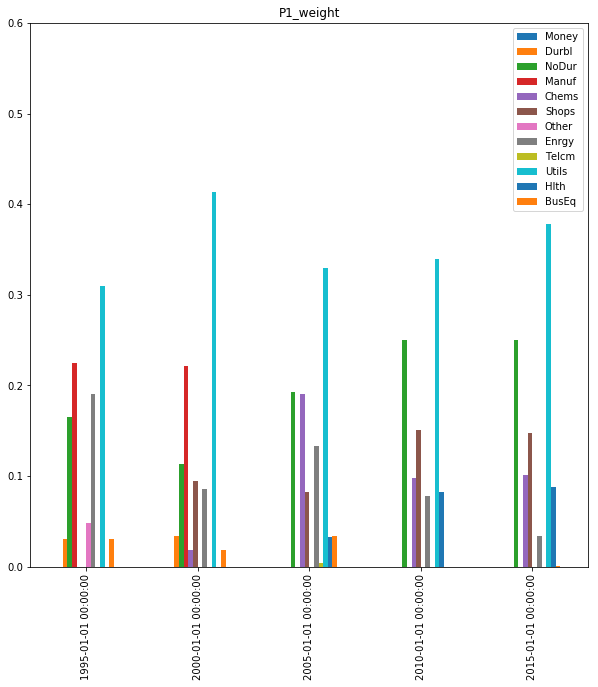

In [142]:
## organize industry ret data 

tmp_ind_ret = industry_ret[ SuperSector['A']+ SuperSector['B']+ SuperSector['C']+ SuperSector['D']]
adj_date= ['1995-01-01',
          '2000-01-01',
          '2005-01-01',
          '2010-01-01',
          '2015-01-01']

## calculate the target weight of P1

def objective_func( w, sigma):
    # w, np.array, the weight to be optimized 
    # sigma, np.array, the cov matrix
    
    # return w.T* sigma* w* 0.5
    
    return ( np.dot( np.dot( w, sigma), w)* 0.5)

def objective_func_deriv( w, sigma):
    # w, np.array, the weight to be optimized
    # sigma, np.array, the cov matrix
    
    # return w.T* sigma
    
    return ( np.dot( w, sigma))

cons_eq0= {'type': 'eq',
          'fun': lambda w: np.array( [np.sum(w)-1] ) ,
          'jac': lambda w: np.array( [1]*12)}
cons_ineq0= {'type': 'ineq', 
             'fun': lambda w: -w[0]-w[1]+ 0.5, 
             'jac': lambda w: np.array([-1]*2+ [0]*10)}
cons_ineq1= {'type': 'ineq',
             'fun': lambda w: -w[2]-w[3]-w[4]-w[5]-w[6]+ 0.5,
             'jac': lambda w: np.array([0]*2+ [-1]*5+ [0]*5)}
cons_ineq2= {'type': 'ineq', 
             'fun': lambda w: -w[7]-w[8]-w[9]-w[10]+ 0.5, 
             'jac': lambda w: np.array([0]*7+ [-1]*4+ [0])}
cons_ineq3= {'type': 'ineq', 
            'fun': lambda w: -w[11]+ 0.5,
            'jac': lambda w: np.array( [0]*11+ [-1])}

cons= (cons_eq0,
       cons_ineq0,
       cons_ineq1,
       cons_ineq2,
       cons_ineq3
      )

             
from scipy.optimize import minimize 
# employ the SLSQP optimizer in scipy to solve the constrained optimization problem 
P1_target_w= {}
for d in adj_date: 
    tmp_ind_ret_partial= tmp_ind_ret.iloc[ tmp_ind_ret.index< d]
    SIGMA_partial= tmp_ind_ret_partial.cov()
    
    opt_res= minimize( objective_func, 
                  x0=[ 1/12.0]* 12,
                  args= SIGMA_partial, 
                  jac= objective_func_deriv, 
                  method= 'SLSQP',
                  options= {'disp': True},
                  constraints= cons,
                  bounds= [[0, None]]*12, 
                  tol= 1e-15
                 )
    P1_target_w[pd.to_datetime(d)]= pd.Series( opt_res.x, index= tmp_ind_ret.columns)

P1_target_w= pd.DataFrame( P1_target_w).T
P2_target_w= pd.DataFrame( np.ones((5,12))*1/12, index= P1_target_w.index, columns= P1_target_w.columns)

# # plot the weight for each industry
# g= plt.figure(figsize= (20, 5))
# plt.subplot(131)
# pd.DataFrame(opt_res.x, index= SIGMA.columns).transpose().plot(kind= 'bar', 
#                                                                title= 'P1.Industry Weight', ax= plt.subplot(131), ylim= [0, 0.6])

# pd.DataFrame(opt_res3.x, index= SIGMA.columns).transpose().plot(kind= 'bar', 
#                                                                title= 'P3.Industry Weight', 
#                                                                 ax= plt.subplot(133), ylim= [0, 0.6])
# fig_dic['P3_weightPlot']= g


# pd.DataFrame( [1/12]*12 , index= SIGMA.columns).transpose().plot( kind= 'bar', 
#                                                                  title= 'P2.Industry Weight', 
#                                                                  ax=plt.subplot(132), ylim= [0, 0.6])
# fig_dic['P_weightPlot']=g 
print( P1_target_w)
plt.figure( figsize=(10,10))
plt.subplot(111)
P1_target_w.plot( kind= 'bar', ax= plt.subplot(111), ylim= (0, 0.6), title= 'P1_weight')

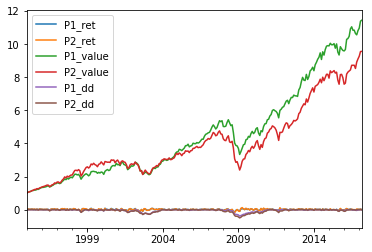

In [143]:
## rebalancing
tmp_index= tmp_ind_ret.loc[ tmp_ind_ret.index>= adj_date[0]].index
tmp_data= pd.DataFrame( [1]* tmp_index.size, index= tmp_index, columns=[ 'todelete'])

P1_target_w_exp = pd.concat([P1_target_w, tmp_data], axis=1)
del P1_target_w_exp['todelete']
P1_target_w_exp.fillna( method= 'ffill', inplace= True)

P2_target_w_exp= pd.DataFrame( np.ones( P1_target_w_exp.shape)* 1/12, 
                              index= P1_target_w_exp.index, 
                              columns= P1_target_w_exp.columns)

partial_ind_ret= tmp_ind_ret.loc[ tmp_ind_ret.index>= adj_date[0]]
P1_target_w_exp= P1_target_w_exp[partial_ind_ret.columns]
P2_target_w_exp= P2_target_w_exp[partial_ind_ret.columns]

P1_ret= pd.Series( np.sum( pd.DataFrame( partial_ind_ret.values* P1_target_w_exp.values), axis =1).tolist(), 
                  index= partial_ind_ret.index, name= 'P1_ret')
P2_ret= pd.Series(np.sum( pd.DataFrame( partial_ind_ret.values* P2_target_w_exp.values), axis= 1).tolist(), 
                  index= partial_ind_ret.index, name= 'P2_ret') 

P1_value= []
P2_value= []
P1_cur_val= 1
P2_cur_val= 1
for d in partial_ind_ret.index:
    P1_cur_val*= (1+ P1_ret.loc[d])
    P2_cur_val*= (1+ P2_ret.loc[d])
    
    P1_value.append(P1_cur_val )
    P2_value.append(P2_cur_val)
    
P1_value= pd.Series( P1_value, index= partial_ind_ret.index, name= 'P1_value')
P2_value= pd.Series( P2_value, index= partial_ind_ret.index, name= 'P2_value')
N= 100000+ P1_value.shape[0]
P1_runningMax= P1_value.rolling(window= N, min_periods= 1).max( )
P2_runningMax= P2_value.rolling(window= N, min_periods= 1).max()
P1_runningdd= (P1_value- P1_runningMax) /P1_runningMax
P2_runningdd= (P2_value- P2_runningMax) /P2_runningMax

P= pd.concat([P1_ret, P2_ret, P1_value, P2_value, P1_runningdd, P2_runningdd], axis=1 )
P.columns= ['P1_ret',
           'P2_ret',
           'P1_value',
           'P2_value',
           'P1_dd',
           'P2_dd']
P.plot()

In [144]:
## calculate Sharpe 

P_ret= {'P1': P['P1_ret'],
       'P2': P['P2_ret']}
Sharpe= {}
for k, val in P_ret.items():
    Sharpe[k]= np.mean(val)/np.std(val)*np.sqrt(12)
## calculate Max DrawDown
P_dd= {'P1': P['P1_dd'],
      'P2': P['P2_dd']}
MaxDrawDown= {}
for k , val in P_dd.items():
    MaxDrawDown[k]= np.min(val)
    
## calculate diversification ratio 

tmp_ind_ret_vol= tmp_ind_ret.std()
P_ret_vol= {'P1': np.std( P['P1_ret']),
           'P2': np.std( P['P2_ret'])}

DR= {'P1':  np.dot(  np.array( tmp_ind_ret_vol.values), np.array(P1_target_w_exp.values[-1] ))/ np.std( P['P1_ret']),
    'P2': np.dot( np.array( tmp_ind_ret_vol.values), np.array(P2_target_w_exp.values[-1]))/ np.std( P['P2_ret'])}
## calculate Mkt Beta
Mkt_Beta= {'P1':  sm.OLS( endog= P_ret['P1']- RF.loc[RF.index>= adj_date[0]], exog= sm.add_constant(factor_ret6['Mkt-RF'].loc[factor_ret6.index>= adj_date[0]])).fit().params.loc['Mkt-RF'] ,
          'P2': sm.OLS(endog= P_ret['P2']- RF.loc[RF.index>= adj_date[0]], exog= sm.add_constant( factor_ret6['Mkt-RF'].loc[factor_ret6.index>= adj_date[0]])).fit().params.loc['Mkt-RF']}
## calculate mean ret 
Avg_ret= {'P1': np.mean( P['P1_ret']),
            'P2': np.mean( P['P2_ret'])}



P_characteristics= pd.DataFrame({'Mkt_Beta': Mkt_Beta, 
                                'AnnualSharpe': Sharpe, 
                                'MaxDrawDown': MaxDrawDown, 
                                'DiversificationRatio': DR,
                                'Avg_MonthlyRet': Avg_ret,
                                'MonthlyRet_Vol': P_ret_vol})


In [145]:
P_characteristics

,AnnualSharpe,Avg_MonthlyRet,DiversificationRatio,MaxDrawDown,Mkt_Beta,MonthlyRet_Vol
P1,0.977161,0.009779,1.175444,-0.386191,0.643149,0.034665
P2,0.790635,0.009342,1.223201,-0.496756,0.902902,0.040932


In [146]:
# plot list 
fig_dic

{'BusEq_GaussianSmoothed': <matplotlib.figure.Figure at 0x12dc2a278>,
 'BusEq_lasso': <matplotlib.figure.Figure at 0x11ec2b358>,
 'BusEq_rollingBeta': <matplotlib.figure.Figure at 0x12b037470>,
 'Chems_GaussianSmoothed': <matplotlib.figure.Figure at 0x128959fd0>,
 'Chems_lasso': <matplotlib.figure.Figure at 0x11e92ea58>,
 'Chems_rollingBeta': <matplotlib.figure.Figure at 0x12b3335c0>,
 'Durbl_GaussianSmoothed': <matplotlib.figure.Figure at 0x12c42a630>,
 'Durbl_lasso': <matplotlib.figure.Figure at 0x10b317dd8>,
 'Durbl_rollingBeta': <matplotlib.figure.Figure at 0x12b2bfe10>,
 'Enrgy_GaussianSmoothed': <matplotlib.figure.Figure at 0x12c829940>,
 'Enrgy_lasso': <matplotlib.figure.Figure at 0x11e65a358>,
 'Enrgy_rollingBeta': <matplotlib.figure.Figure at 0x12b22fa58>,
 'Hlth_GaussianSmoothed': <matplotlib.figure.Figure at 0x128237e10>,
 'Hlth_lasso': <matplotlib.figure.Figure at 0x11f7f0be0>,
 'Hlth_rollingBeta': <matplotlib.figure.Figure at 0x1282abb70>,
 'Industry_Grouping_3d_1': <matpl